# Introduction

This notebook backtests 1000 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import get_hist, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_1000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers, "10y")

Simulating 917 stocks



local minima and maxima: 100%|██████████| 917/917 [08:02<00:00,  1.90it/s]


Unable to determine minima and maxima for the following tickers:
['ARGO', 'CATY', 'CHE', 'CFR', 'HE', 'NSP', 'LMT', 'MCK', 'OMF', 'SPTN', 'TAC', 'TRMK', 'WEYS']
Simulating with remaining 904 stocks



possible trades: 100%|██████████| 904/904 [20:10<00:00,  1.34s/it]


Possible trades to simulate: 9442
Trading days to simulate:  : 740 

before day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
*** buying 2000.0 in WST on 2017-03-22 00:00:00 with target sell date of 2017-06-07 00:00:00
enough money (10000) to buy WST (capital=10000
invested in: [] (0)
after buy: invested in ['WST'] (1
capital=10000 in_use=2000.0 free=8000.0
*** buying 2000.0 in CVGI on 2017-03-22 00:00:00 with target sell date of 2017-04-17 00:00:00
enough money (8000.0) to buy CVGI (capital=10000
invested in: ['WST'] (1)
after buy: invested in ['WST', 'CVGI'] (2
capital=10000 in_use=4000.0 free=6000.0
*** buying 2000.0 in LNDC on 2017-03-22 00:00:00 with target sell date of 2017-04-20

after buy: invested in ['WST', 'REX', 'TDG', 'USM', 'IMMR'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in FMBI on 2017-03-22 00:00:00 with target sell date of 2017-04-24 00:00:00
maxed out: FMBI is not expected to perform better than stocks already invested in
invested in: ['WST', 'REX', 'TDG', 'USM', 'IMMR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['WST', 'REX', 'TDG', 'USM', 'IMMR'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in SPG on 2017-03-22 00:00:00 with target sell date of 2017-04-11 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['WST', 'REX', 'TDG', 'USM', 'IMMR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['WST', 'REX', 'TDG', 'USM', 'IMMR'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in CSFL on 2017-03-22 00:00:00 with target sell date of 2017-04-21 00:00:00
maxed out: CSFL is not expected to perform better than st

after buy: invested in ['WST', 'REX', 'USM', 'IMMR', 'JCS'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in BRT on 2017-03-22 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: BRT is not expected to perform better than stocks already invested in
invested in: ['WST', 'REX', 'USM', 'IMMR', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['WST', 'REX', 'USM', 'IMMR', 'JCS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in WTM on 2017-03-22 00:00:00 with target sell date of 2017-03-24 00:00:00
maxed out: WTM is not expected to perform better than stocks already invested in
invested in: ['WST', 'REX', 'USM', 'IMMR', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['WST', 'REX', 'USM', 'IMMR', 'JCS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in MINI on 2017-03-22 00:00:00 with target sell date of 2017-06-08 00:00:00
maxed out: MINI is not expected to perform better than stoc

profit of selling WST on 2017-03-23 00:00:00:  -5.858380030565058 -0.29%
enough money (1994.141619969435) to buy ARWR (capital=9993.388229713284
invested in: ['IMMR', 'JCS', 'VTNR', 'DXCM'] (4)
you do not have 1994.141619969435 and setting amount to 1994.141619969435
after buy: invested in ['IMMR', 'JCS', 'VTNR', 'DXCM', 'ARWR'] (5
capital=9993.388229713284 in_use=9993.388229713284 free=0.0
*** buying 1998.677645942657 in DIN on 2017-03-23 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: DIN is not expected to perform better than stocks already invested in
invested in: ['IMMR', 'JCS', 'VTNR', 'DXCM', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IMMR', 'JCS', 'VTNR', 'DXCM', 'ARWR'] (5)
capital=9993.388229713284 in_use=9993.388229713284 free=0.0
*** buying 1998.677645942657 in AZO on 2017-03-23 00:00:00 with target sell date of 2017-08-28 00:00:00
maxed out: AZO is not expected to perform better than stocks already invested in
invested in:

after buy: invested in ['JCS', 'DXCM', 'SYX', 'PTSI', 'TECH'] (5
capital=9932.957661809203 in_use=9927.963412031748 free=4.994249777454797
*** buying 1986.5915323618406 in AGCO on 2017-03-24 00:00:00 with target sell date of 2017-03-27 00:00:00
maxed out: AGCO is not expected to perform better than stocks already invested in
invested in: ['JCS', 'DXCM', 'SYX', 'PTSI', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['JCS', 'DXCM', 'SYX', 'PTSI', 'TECH'] (5)
capital=9932.957661809203 in_use=9927.963412031748 free=4.994249777454797
*** buying 1986.5915323618406 in SYBT on 2017-03-24 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: SYBT is not expected to perform better than stocks already invested in
invested in: ['JCS', 'DXCM', 'SYX', 'PTSI', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['JCS', 'DXCM', 'SYX', 'PTSI', 'TECH'] (5)
capital=9932.957661809203 in_use=9927.963412031748 free=4.994249777454797
before day_cl

after buy: invested in ['DXCM', 'SYX', 'PTSI', 'TECH', 'EXAS'] (5
capital=10104.817188987498 in_use=10104.8171889875 free=0.0
*** buying 2020.9634377974994 in MTSC on 2017-03-27 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: MTSC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'PTSI', 'TECH', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'PTSI', 'TECH', 'EXAS'] (5)
capital=10104.817188987498 in_use=10104.8171889875 free=0.0
*** buying 2020.9634377974994 in KEQU on 2017-03-27 00:00:00 with target sell date of 2017-06-08 00:00:00
maxed out: KEQU is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'SYX', 'PTSI', 'TECH', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'SYX', 'PTSI', 'TECH', 'EXAS'] (5)
capital=10104.817188987498 in_use=10104.8171889875 free=0.0
*** buying 2020.9634377974994 in GMO on 2017-03-27

after buy: invested in ['SYX', 'PTSI', 'MTEM', 'ZN', 'RICK'] (5
capital=11310.39605573254 in_use=11310.396055732544 free=0.0
*** buying 2262.079211146508 in PKBK on 2017-03-30 00:00:00 with target sell date of 2017-05-08 00:00:00
*** selling RICK on 2017-03-30 00:00:00 to free up money for PKBK
profit of selling RICK on 2017-03-30 00:00:00:  0.0 0.0%
enough money (2234.436635469497) to buy PKBK (capital=11310.39605573254
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN'] (4)
you do not have 2234.436635469497 and setting amount to 2234.436635469497
after buy: invested in ['SYX', 'PTSI', 'MTEM', 'ZN', 'PKBK'] (5
capital=11310.39605573254 in_use=11310.396055732544 free=0.0
*** buying 2262.079211146508 in FWRD on 2017-03-30 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: FWRD is not expected to perform better than stocks already invested in
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'PKBK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'PTSI', 'MTEM', 

after buy: invested in ['SYX', 'PTSI', 'MTEM', 'ZN', 'CCMP'] (5
capital=11290.344865407733 in_use=11246.638016745364 free=43.70684866237343
*** buying 2258.0689730815466 in INFI on 2017-03-31 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: INFI is not expected to perform better than stocks already invested in
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'CCMP'] (5)
capital=11290.344865407733 in_use=11246.638016745364 free=43.70684866237343
*** buying 2258.0689730815466 in ALK on 2017-03-31 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: ALK is not expected to perform better than stocks already invested in
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'CCMP'] (5)
capital=11290.344865407733 in_use=11246.638016745364 free=43.70684866237343
before day_clo

after buy: invested in ['SYX', 'PTSI', 'MTEM', 'ZN', 'LULU'] (5
capital=11410.896003017277 in_use=11410.896003017282 free=0.0
*** buying 2282.1792006034552 in HWC on 2017-04-04 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'LULU'] (5)
capital=11410.896003017277 in_use=11410.896003017282 free=0.0
*** buying 2282.1792006034552 in XRAY on 2017-04-04 00:00:00 with target sell date of 2017-04-06 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'PTSI', 'MTEM', 'ZN', 'LULU'] (5)
capital=11410.896003017277 in_use=11410.896003017282 free=0.0
*** buying 2282.1792006034552 in GPK on 2017-04-04 00:00

after buy: invested in ['PTSI', 'ZN', 'LULU', 'SKYW', 'ISSC'] (5
capital=11360.618494550958 in_use=10278.151506626156 free=1082.466987924805
*** buying 2272.1236989101917 in ALCO on 2017-04-07 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'ISSC'] (5)
capital=11360.618494550958 in_use=10278.151506626156 free=1082.466987924805
*** buying 2272.1236989101917 in HWKN on 2017-04-07 00:00:00 with target sell date of 2017-05-01 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'ISSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'ISSC'] (5)
capital=11360.618494550958 in_use=10278.151506626156 free=1082.466987924805
*** buy

after buy: invested in ['PTSI', 'ZN', 'LULU', 'SKYW', 'CCMP'] (5
capital=11418.9182072193 in_use=10326.482470056959 free=1092.4357371623437
*** buying 2283.78364144386 in ROP on 2017-04-12 00:00:00 with target sell date of 2017-05-09 00:00:00
maxed out: ROP is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'CCMP'] (5)
capital=11418.9182072193 in_use=10326.482470056959 free=1092.4357371623437
*** buying 2283.78364144386 in PFIS on 2017-04-12 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: PFIS is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'CCMP'] (5)
capital=11418.9182072193 in_use=10326.482470056959 free=1092.4357371623437
*** buying 2283.

after buy: invested in ['PTSI', 'ZN', 'LULU', 'SKYW', 'TRNS'] (5
capital=11413.756950363555 in_use=10337.215527244556 free=1076.541423119003
*** buying 2282.751390072711 in JBLU on 2017-04-17 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'TRNS'] (5)
capital=11413.756950363555 in_use=10337.215527244556 free=1076.541423119003
*** buying 2282.751390072711 in SMP on 2017-04-17 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'SKYW', 'TRNS'] (5)
capital=11413.756950363555 in_use=10337.215527244556 free=1076.541423119003
*** buying 

after buy: invested in ['PTSI', 'ZN', 'LULU', 'TRNS', 'NVDA'] (5
capital=11393.4849844083 in_use=10580.95944219224 free=812.5255422160676
*** buying 2278.69699688166 in BDSI on 2017-04-20 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'TRNS', 'NVDA'] (5)
capital=11393.4849844083 in_use=10580.95944219224 free=812.5255422160676
*** buying 2278.69699688166 in PLOW on 2017-04-20 00:00:00 with target sell date of 2017-04-21 00:00:00
maxed out: PLOW is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'LULU', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'LULU', 'TRNS', 'NVDA'] (5)
capital=11393.4849844083 in_use=10580.95944219224 free=812.5255422160676
*** buying 2278.6969

after buy: invested in ['ZN', 'LULU', 'TRNS', 'NVDA', 'PLOW'] (5
capital=11639.286657445533 in_use=11060.613210291478 free=578.6734471540635
before day_close: 2017-04-24 00:00:00 5 11639.286657445533 11060.613210291478 578.6734471540635 8.640199666842818e-12 True
after day_close: 2017-04-24 00:00:00 5 11794.170988249241 11215.497541095187 578.6734471540635 8.640199666842818e-12 True
*** buying 2358.834197649848 in CVX on 2017-04-25 00:00:00 with target sell date of 2017-07-31 00:00:00
*** selling PLOW on 2017-04-25 00:00:00 to free up money for CVX
profit of selling PLOW on 2017-04-25 00:00:00:  72.28405069398559 3.11%
enough money (2978.8148293371555) to buy CVX (capital=11866.455038943226
invested in: ['ZN', 'LULU', 'TRNS', 'NVDA'] (4)
after buy: invested in ['ZN', 'LULU', 'TRNS', 'NVDA', 'CVX'] (5
capital=11866.455038943226 in_use=11246.474407255928 free=619.9806316873073
*** buying 2373.2910077886454 in DSPG on 2017-04-25 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed 

after day_close: 2017-04-27 00:00:00 5 11892.311712974784 11371.651829095019 520.659883879775 9.549694368615746e-12 True
*** buying 2378.4623425949567 in GLUU on 2017-04-28 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling JCS on 2017-04-28 00:00:00 to free up money for GLUU
profit of selling JCS on 2017-04-28 00:00:00:  -54.81167867048862 -2.31%
enough money (2841.0209475971337) to buy GLUU (capital=11837.500034304296
invested in: ['ZN', 'LULU', 'TRNS', 'NVDA'] (4)
after buy: invested in ['ZN', 'LULU', 'TRNS', 'NVDA', 'GLUU'] (5
capital=11837.500034304296 in_use=11374.94142930213 free=462.55860500217705
*** buying 2367.5000068608592 in FNCB on 2017-04-28 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'LULU', 'TRNS', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'LULU', 'TRNS', 'NVDA', 'GLUU'] (5)
capital=11837.50003430

after buy: invested in ['LULU', 'TRNS', 'NVDA', 'GLUU', 'AUB'] (5
capital=12294.823680370388 in_use=11795.436815636946 free=499.38686473345115
*** buying 2458.9647360740773 in WOR on 2017-05-02 00:00:00 with target sell date of 2017-06-15 00:00:00
*** selling AUB on 2017-05-02 00:00:00 to free up money for WOR
profit of selling AUB on 2017-05-02 00:00:00:  0.0 0.0%
enough money (2958.3516008075285) to buy WOR (capital=12294.823680370388
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU'] (4)
after buy: invested in ['LULU', 'TRNS', 'NVDA', 'GLUU', 'WOR'] (5
capital=12294.823680370388 in_use=11795.436815636946 free=499.38686473345115
*** buying 2458.9647360740773 in UNF on 2017-05-02 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'WOR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'WOR'] (5)
capital=12294.82

after buy: invested in ['LULU', 'TRNS', 'NVDA', 'GLUU', 'BASI'] (5
capital=12222.917087627737 in_use=11792.4630271065 free=430.4540605212469
*** buying 2444.5834175255472 in PW on 2017-05-05 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: PW is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'BASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'BASI'] (5)
capital=12222.917087627737 in_use=11792.4630271065 free=430.4540605212469
*** buying 2444.5834175255472 in GRIF on 2017-05-05 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'BASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'GLUU', 'BASI'] (5)
capital=12222.917087627737 in_use=11792.4630271065 free=430.4540605212469
*** buy

after buy: invested in ['LULU', 'TRNS', 'NVDA', 'DOV', 'IAG'] (5
capital=12506.47452462086 in_use=11894.316340753845 free=612.1581838670227
*** buying 2501.294904924172 in SEB on 2017-05-10 00:00:00 with target sell date of 2017-06-16 00:00:00
*** selling IAG on 2017-05-10 00:00:00 to free up money for SEB
profit of selling IAG on 2017-05-10 00:00:00:  0.0 0.0%
enough money (3113.4530887911947) to buy SEB (capital=12506.47452462086
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV'] (4)
after buy: invested in ['LULU', 'TRNS', 'NVDA', 'DOV', 'SEB'] (5
capital=12506.47452462086 in_use=11894.316340753845 free=612.1581838670227
*** buying 2501.294904924172 in IONS on 2017-05-10 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'SEB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'SEB'] (5)
capital=12506.47452462086 

after day_close: 2017-05-19 00:00:00 5 13405.10209372009 13073.619135194343 331.4829585257544 7.73070496506989e-12 True
*** buying 2681.020418744018 in ETH on 2017-05-22 00:00:00 with target sell date of 2017-07-13 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'CORT'] (5)
capital=13405.10209372009 in_use=13073.619135194343 free=331.4829585257544
*** buying 2681.020418744018 in COT on 2017-05-22 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'CORT'] (5)
capital=13405.10209372009 in_use=13073.619135194343 free=331.4829585257544
*** buying 2681.020418744018 in 

after buy: invested in ['LULU', 'TRNS', 'NVDA', 'DOV', 'TNAV'] (5
capital=13514.909933801804 in_use=12870.436364200163 free=644.473569601651
*** buying 2702.981986760361 in NLS on 2017-05-25 00:00:00 with target sell date of 2017-06-02 00:00:00
maxed out: NLS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'TNAV'] (5)
capital=13514.909933801804 in_use=12870.436364200163 free=644.473569601651
*** buying 2702.981986760361 in FFBC on 2017-05-25 00:00:00 with target sell date of 2017-06-23 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'DOV', 'TNAV'] (5)
capital=13514.909933801804 in_use=12870.436364200163 free=644.473569601651
*** buyin

after buy: invested in ['LULU', 'TRNS', 'NVDA', 'EXAS', 'FICO'] (5
capital=13558.309874841889 in_use=13062.601128178592 free=495.70874666330656
*** buying 2711.6619749683778 in SANM on 2017-05-30 00:00:00 with target sell date of 2017-06-20 00:00:00
*** selling FICO on 2017-05-30 00:00:00 to free up money for SANM
profit of selling FICO on 2017-05-30 00:00:00:  0.0 0.0%
enough money (3217.3502180787664) to buy SANM (capital=13558.309874841889
invested in: ['LULU', 'TRNS', 'NVDA', 'EXAS'] (4)
after buy: invested in ['LULU', 'TRNS', 'NVDA', 'EXAS', 'SANM'] (5
capital=13558.309874841889 in_use=13052.62163173151 free=505.6882431103886
*** buying 2711.6619749683778 in ADP on 2017-05-30 00:00:00 with target sell date of 2017-06-02 00:00:00
maxed out: ADP is not expected to perform better than stocks already invested in
invested in: ['LULU', 'TRNS', 'NVDA', 'EXAS', 'SANM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'TRNS', 'NVDA', 'EXAS', 'SANM'] (5)
capital=1

after buy: invested in ['TRNS', 'NVDA', 'SANM', 'TIPT', 'NEM'] (5
capital=14331.639975756985 in_use=13980.240226624643 free=351.3997491323503
*** buying 2866.327995151397 in BTE on 2017-06-02 00:00:00 with target sell date of 2017-07-27 00:00:00
*** selling NEM on 2017-06-02 00:00:00 to free up money for BTE
profit of selling NEM on 2017-06-02 00:00:00:  0.0 0.0%
enough money (3217.727744283747) to buy BTE (capital=14331.639975756985
invested in: ['TRNS', 'NVDA', 'SANM', 'TIPT'] (4)
after buy: invested in ['TRNS', 'NVDA', 'SANM', 'TIPT', 'BTE'] (5
capital=14331.639975756985 in_use=13980.240226624643 free=351.3997491323503
*** buying 2866.327995151397 in MTSC on 2017-06-02 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: MTSC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'SANM', 'TIPT', 'BTE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'SANM', 'TIPT', 'BTE'] (5)
capital=14331.63997

after buy: invested in ['TRNS', 'NVDA', 'SANM', 'CVI', 'DXCM'] (5
capital=14328.380494077384 in_use=13987.413390722071 free=340.96710335532
before day_close: 2017-06-08 00:00:00 5 14328.380494077384 13987.413390722071 340.96710335532 6.821210263296962e-12 True
after day_close: 2017-06-08 00:00:00 5 14739.37635666556 14398.409253310247 340.96710335532 6.821210263296962e-12 True
*** buying 2947.875271333112 in VSH on 2017-06-09 00:00:00 with target sell date of 2017-07-21 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'SANM', 'CVI', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'SANM', 'CVI', 'DXCM'] (5)
capital=14739.37635666556 in_use=14398.409253310247 free=340.96710335532
*** buying 2947.875271333112 in SGRP on 2017-06-09 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: SGRP is not expected to perform better than stocks already invested in
invested in

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5
capital=14723.521379465592 in_use=14468.095264348092 free=255.42611511750601
*** buying 2944.7042758931184 in LNN on 2017-06-14 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)
capital=14723.521379465592 in_use=14468.095264348092 free=255.42611511750601
*** buying 2944.7042758931184 in WMS on 2017-06-14 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: WMS is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)
capital=14723.521379465592 in_use=14468.095264348092 free=255.4261151175060

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'PRO'] (5
capital=14974.020869256949 in_use=14592.03928312306 free=381.98158613389296
*** buying 2994.80417385139 in FLNT on 2017-06-19 00:00:00 with target sell date of 2017-07-03 00:00:00
*** selling PRO on 2017-06-19 00:00:00 to free up money for FLNT
profit of selling PRO on 2017-06-19 00:00:00:  0.0 0.0%
enough money (3376.7857599852828) to buy FLNT (capital=14974.020869256949
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU'] (4)
after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'FLNT'] (5
capital=14974.020869256949 in_use=14592.03928312306 free=381.98158613389296
*** buying 2994.80417385139 in AEM on 2017-06-19 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: AEM is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'FLNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'FLNT'] (5)
capital=14974.02

after day_close: 2017-06-21 00:00:00 5 15501.715895901067 15225.9577547714 275.75814112967555 8.640199666842818e-12 True
*** buying 3100.343179180213 in KLIC on 2017-06-22 00:00:00 with target sell date of 2017-08-01 00:00:00
maxed out: KLIC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)
capital=15501.715895901067 in_use=15225.9577547714 free=275.75814112967555
*** buying 3100.343179180213 in HCCI on 2017-06-22 00:00:00 with target sell date of 2017-07-07 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'EXAS'] (5)
capital=15501.715895901067 in_use=15225.9577547714 free=275.75814112967555
*** buying 3100.3431791

after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'CATC'] (5
capital=15573.517753417475 in_use=15170.659116882896 free=402.8586365345859
*** buying 3114.703550683495 in TIPT on 2017-06-23 00:00:00 with target sell date of 2017-06-30 00:00:00
*** selling CATC on 2017-06-23 00:00:00 to free up money for TIPT
profit of selling CATC on 2017-06-23 00:00:00:  0.0 0.0%
enough money (3517.562187218081) to buy TIPT (capital=15573.517753417475
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU'] (4)
after buy: invested in ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TIPT'] (5
capital=15573.517753417475 in_use=15170.659116882896 free=402.8586365345859
*** buying 3114.703550683495 in ITT on 2017-06-23 00:00:00 with target sell date of 2017-07-07 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TIPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'NVDA', 'DXCM', 'GLUU', 'TIPT'] (5)
capital=1557

after buy: invested in ['TRNS', 'DXCM', 'GLUU', 'REX', 'EXAS'] (5
capital=15530.966389417115 in_use=14671.43532914682 free=859.5310602703048
*** buying 3106.193277883423 in ASMB on 2017-06-27 00:00:00 with target sell date of 2017-07-17 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'EXAS'] (5)
capital=15530.966389417115 in_use=14671.43532914682 free=859.5310602703048
*** buying 3106.193277883423 in RNR on 2017-06-27 00:00:00 with target sell date of 2017-08-16 00:00:00
maxed out: RNR is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'EXAS'] (5)
capital=15530.966389417115 in_use=14671.43532914682 free=859.5310602703048
*** buyin

after buy: invested in ['TRNS', 'DXCM', 'GLUU', 'REX', 'CCMP'] (5
capital=15677.565988844586 in_use=14621.104050972182 free=1056.4619378724142
*** buying 3135.513197768917 in CPB on 2017-06-29 00:00:00 with target sell date of 2017-08-03 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'CCMP'] (5)
capital=15677.565988844586 in_use=14621.104050972182 free=1056.4619378724142
*** buying 3135.513197768917 in ECHO on 2017-06-29 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: ECHO is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'CCMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'REX', 'CCMP'] (5)
capital=15677.565988844586 in_use=14621.104050972182 free=1056.4619378724142
***

*** buying 3088.0096233376908 in WCN on 2017-07-10 00:00:00 with target sell date of 2017-07-27 00:00:00
maxed out: WCN is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'CTAS'] (5)
capital=15440.048116688453 in_use=14335.198075229568 free=1104.8500414588948
*** buying 3088.0096233376908 in CTHR on 2017-07-10 00:00:00 with target sell date of 2017-08-28 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'CTAS'] (5)
capital=15440.048116688453 in_use=14335.198075229568 free=1104.8500414588948
*** buying 3088.0096233376908 in WMS on 2017-07-10 00:00:00 with target sell date of 2017-07-11 00:00:00
maxed out: WMS is not expected to p

after buy: invested in ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'ARWR'] (5
capital=15614.610950568507 in_use=14527.427500942431 free=1087.1834496260853
*** buying 3122.9221901137016 in ETR on 2017-07-13 00:00:00 with target sell date of 2017-08-21 00:00:00
maxed out: ETR is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'ARWR'] (5)
capital=15614.610950568507 in_use=14527.427500942431 free=1087.1834496260853
*** buying 3122.9221901137016 in NLS on 2017-07-13 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: NLS is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'ARWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'CCMP', 'ARWR'] (5)
capital=15614.610950568507 in_use=14527.427500942431 free=1087.183449626085

after buy: invested in ['TRNS', 'DXCM', 'GLUU', 'DPZ', 'PTSI'] (5
capital=15691.619933073573 in_use=14558.873178019428 free=1132.7467550541505
*** buying 3138.3239866147146 in AUB on 2017-07-19 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: AUB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'DPZ', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'DPZ', 'PTSI'] (5)
capital=15691.619933073573 in_use=14558.873178019428 free=1132.7467550541505
*** buying 3138.3239866147146 in PEBO on 2017-07-19 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: PEBO is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'GLUU', 'DPZ', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'GLUU', 'DPZ', 'PTSI'] (5)
capital=15691.619933073573 in_use=14558.873178019428 free=1132.7467550541505
*

after buy: invested in ['TRNS', 'DXCM', 'PTSI', 'SYX', 'BHLB'] (5
capital=15879.48157518426 in_use=14694.463748061473 free=1185.0178271227915
*** buying 3175.896315036852 in CBU on 2017-07-24 00:00:00 with target sell date of 2017-10-13 00:00:00
*** selling BHLB on 2017-07-24 00:00:00 to free up money for CBU
profit of selling BHLB on 2017-07-24 00:00:00:  0.0 0.0%
enough money (4360.914142159643) to buy CBU (capital=15879.48157518426
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX'] (4)
after buy: invested in ['TRNS', 'DXCM', 'PTSI', 'SYX', 'CBU'] (5
capital=15879.48157518426 in_use=14694.463748061473 free=1185.0178271227915
*** buying 3175.896315036852 in FHB on 2017-07-24 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'CBU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'CBU'] (5)
capital=15879.4815751842

after buy: invested in ['TRNS', 'DXCM', 'PTSI', 'SYX', 'NOA'] (5
capital=15938.561305180072 in_use=14766.08967456199 free=1172.4716306180862
*** buying 3187.7122610360143 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'NOA'] (5)
capital=15938.561305180072 in_use=14766.08967456199 free=1172.4716306180862
*** buying 3187.7122610360143 in MSCI on 2017-07-26 00:00:00 with target sell date of 2017-07-31 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'DXCM', 'PTSI', 'SYX', 'NOA'] (5)
capital=15938.561305180072 in_use=14766.08967456199 free=1172.4716306180862
*** buy

after buy: invested in ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5
capital=15703.040682752142 in_use=15253.77229172586 free=449.26839102628674
*** buying 3140.6081365504283 in ALCO on 2017-07-31 00:00:00 with target sell date of 2017-08-11 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)
capital=15703.040682752142 in_use=15253.77229172586 free=449.26839102628674
*** buying 3140.6081365504283 in WCN on 2017-07-31 00:00:00 with target sell date of 2017-08-03 00:00:00
maxed out: WCN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)
capital=15703.040682752142 in_use=15253.77229172586 free=449.26839102628674
*** buying 314

after day_close: 2017-08-07 00:00:00 5 16699.979006955597 16250.71061592932 449.26839102628674 1.000444171950221e-11 True
*** buying 3339.995801391119 in SMP on 2017-08-08 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)
capital=16699.979006955597 in_use=16250.71061592932 free=449.26839102628674
*** buying 3339.995801391119 in RSG on 2017-08-08 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NOA', 'UNT'] (5)
capital=16699.979006955597 in_use=16250.71061592932 free=449.26839102628674
*** buying 3339.995801391119 in EPD 

after buy: invested in ['DXCM', 'PTSI', 'SYX', 'UNT', 'AMWD'] (5
capital=15797.92302210738 in_use=15658.685460492561 free=139.2375616148306
*** buying 3159.584604421476 in IMAX on 2017-08-11 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling AMWD on 2017-08-11 00:00:00 to free up money for IMAX
profit of selling AMWD on 2017-08-11 00:00:00:  -4.547473508864641e-13 -0.0%
enough money (3298.822166036306) to buy IMAX (capital=15797.92302210738
invested in: ['DXCM', 'PTSI', 'SYX', 'UNT'] (4)
after buy: invested in ['DXCM', 'PTSI', 'SYX', 'UNT', 'IMAX'] (5
capital=15797.92302210738 in_use=15658.685460492561 free=139.23756161483016
*** buying 3159.584604421476 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'UNT', 'IMAX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'UNT', 'IMAX'] (5)
capi

after buy: invested in ['DXCM', 'PTSI', 'SYX', 'NVDA', 'RGS'] (5
capital=16270.664807989819 in_use=16270.664807989826 free=0.0
*** buying 3254.132961597964 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2911.287123742488) to buy HOFT (capital=16270.664807989819
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA'] (4)
you do not have 2911.287123742488 and setting amount to 2911.287123742488
after buy: invested in ['DXCM', 'PTSI', 'SYX', 'NVDA', 'HOFT'] (5
capital=16270.664807989819 in_use=16270.664807989826 free=0.0
*** buying 3254.132961597964 in MRK on 2017-08-17 00:00:00 with target sell date of 2017-09-21 00:00:00
maxed out: MRK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'HOFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', '

after day_close: 2017-08-18 00:00:00 5 16075.937030796707 16075.937030796715 0.0 7.275957614183426e-12 True
*** buying 3215.1874061593417 in NM on 2017-08-21 00:00:00 with target sell date of 2017-08-23 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'REX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'REX'] (5)
capital=16075.937030796707 in_use=16075.937030796715 free=0.0
*** buying 3215.1874061593417 in CNOB on 2017-08-21 00:00:00 with target sell date of 2017-10-18 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'REX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'REX'] (5)
capital=16075.937030796707 in_use=16075.937030796715 free=0.0
*** buying 3215.1874061593417 in KMX on 2017-08-21 00:00:00 with target 

after day_close: 2017-08-29 00:00:00 5 16917.879016553845 16917.879016553852 0.0 7.275957614183426e-12 True
*** buying 3383.575803310769 in VRTS on 2017-08-30 00:00:00 with target sell date of 2017-10-04 00:00:00
maxed out: VRTS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)
capital=16917.879016553845 in_use=16917.879016553852 free=0.0
*** buying 3383.575803310769 in OSBC on 2017-08-30 00:00:00 with target sell date of 2017-09-21 00:00:00
maxed out: OSBC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)
capital=16917.879016553845 in_use=16917.879016553852 free=0.0
*** buying 3383.575803310769 in SBSI on 2017-08-30 00:00:00 with t

after day_close: 2017-09-06 00:00:00 5 17137.973431752107 17137.973431752114 0.0 7.275957614183426e-12 True
*** buying 3427.5946863504214 in PLUS on 2017-09-07 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)
capital=17137.973431752107 in_use=17137.973431752114 free=0.0
*** buying 3427.5946863504214 in SNX on 2017-09-07 00:00:00 with target sell date of 2017-10-04 00:00:00
maxed out: SNX is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SYX', 'NVDA', 'SKYW'] (5)
capital=17137.973431752107 in_use=17137.973431752114 free=0.0
*** buying 3427.5946863504214 in AMG on 2017-09-07 00:00:00 with t

after buy: invested in ['DXCM', 'PTSI', 'SKYW', 'BTE', 'ZN'] (5
capital=16994.30783354833 in_use=16460.306012297053 free=534.0018212512759
*** buying 3398.861566709666 in CSII on 2017-09-11 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: CSII is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SKYW', 'BTE', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SKYW', 'BTE', 'ZN'] (5)
capital=16994.30783354833 in_use=16460.306012297053 free=534.0018212512759
before day_close: 2017-09-11 00:00:00 5 16994.30783354833 16460.306012297053 534.0018212512759 9.094947017729282e-13 True
after day_close: 2017-09-11 00:00:00 5 17108.46356000004 16574.46173874876 534.0018212512759 4.547473508864641e-12 True
*** buying 3421.692712000008 in EDSA on 2017-09-12 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: EDSA is not expected to perform better than stocks already invested in
invested i

after buy: invested in ['DXCM', 'PTSI', 'SKYW', 'ZN', 'PCRX'] (5
capital=17800.507145379233 in_use=17085.052314020275 free=715.4548313589539
*** buying 3560.1014290758467 in BREW on 2017-09-14 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: BREW is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'PCRX'] (5)
capital=17800.507145379233 in_use=17085.052314020275 free=715.4548313589539
*** buying 3560.1014290758467 in UMPQ on 2017-09-14 00:00:00 with target sell date of 2017-09-18 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'PCRX'] (5)
capital=17800.507145379233 in_use=17085.052314020275 free=715.4548313589539
*** buy

after day_close: 2017-09-25 00:00:00 5 17732.573600797605 17194.597283745567 537.9763170520309 7.275957614183426e-12 True
*** buying 3546.514720159521 in KIRK on 2017-09-26 00:00:00 with target sell date of 2017-10-20 00:00:00
maxed out: KIRK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'LULU'] (5)
capital=17732.573600797605 in_use=17194.597283745567 free=537.9763170520309
*** buying 3546.514720159521 in FARM on 2017-09-26 00:00:00 with target sell date of 2017-10-20 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'PTSI', 'SKYW', 'ZN', 'LULU'] (5)
capital=17732.573600797605 in_use=17194.597283745567 free=537.9763170520309
*** buying 3546.514720159521

after buy: invested in ['PTSI', 'SKYW', 'ZN', 'LULU', 'DSGX'] (5
capital=17493.219212949836 in_use=17493.219212949836 free=0.0
*** buying 3498.6438425899673 in AAME on 2017-09-29 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'SKYW', 'ZN', 'LULU', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'SKYW', 'ZN', 'LULU', 'DSGX'] (5)
capital=17493.219212949836 in_use=17493.219212949836 free=0.0
*** buying 3498.6438425899673 in COR on 2017-09-29 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: COR is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'SKYW', 'ZN', 'LULU', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'SKYW', 'ZN', 'LULU', 'DSGX'] (5)
capital=17493.219212949836 in_use=17493.219212949836 free=0.0
*** buying 3498.6438425899673 in WMT on 2017-09-29 

after buy: invested in ['PTSI', 'SKYW', 'LULU', 'PCTI', 'TBBK'] (5
capital=17952.770691821766 in_use=17952.770691821766 free=0.0
before day_close: 2017-10-03 00:00:00 5 17952.770691821766 17952.770691821766 0.0 0.0 True
after day_close: 2017-10-03 00:00:00 5 18040.317817409163 18040.317817409163 0.0 0.0 True
invested in: ['PTSI', 'SKYW', 'LULU', 'PCTI', 'TBBK'] (5)
capital=18040.317817409163 in_use=18040.317817409163 free=0.0
*** selling TBBK on 2017-10-04 00:00:00
profit of selling TBBK on 2017-10-04 00:00:00:  -39.125826621134365 -1.66%
after selling invested in: ['PTSI', 'SKYW', 'LULU', 'PCTI'] (4)
capital=18001.19199078803 in_use=15681.589412535053 free=2319.602578252975
*** buying 3600.238398157606 in WMT on 2017-10-04 00:00:00 with target sell date of 2017-12-26 00:00:00
enough money (2319.602578252975) to buy WMT (capital=18001.19199078803
invested in: ['PTSI', 'SKYW', 'LULU', 'PCTI'] (4)
you do not have 2319.602578252975 and setting amount to 2319.602578252975
after buy: invest

after day_close: 2017-10-09 00:00:00 5 18198.28946193433 18145.0448884326 53.24457350173088 9.094947017729282e-13 True
*** buying 3639.6578923868665 in GLUU on 2017-10-10 00:00:00 with target sell date of 2017-12-13 00:00:00
*** selling UI on 2017-10-10 00:00:00 to free up money for GLUU
profit of selling UI on 2017-10-10 00:00:00:  -4.186133444648931 -0.18%
enough money (2369.013595081337) to buy GLUU (capital=18243.918316481002
invested in: ['PTSI', 'SKYW', 'LULU', 'ZN'] (4)
you do not have 2369.013595081337 and setting amount to 2369.013595081337
after buy: invested in ['PTSI', 'SKYW', 'LULU', 'ZN', 'GLUU'] (5
capital=18243.918316481002 in_use=18243.918316481002 free=0.0
*** buying 3648.7836632962003 in NSYS on 2017-10-10 00:00:00 with target sell date of 2017-10-18 00:00:00
maxed out: NSYS is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'SKYW', 'LULU', 'ZN', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', '

*** buying 3848.6797504153174 in SB on 2017-10-19 00:00:00 with target sell date of 2017-10-25 00:00:00
maxed out: SB is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'LULU', 'ZN', 'GLUU', 'ROST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'LULU', 'ZN', 'GLUU', 'ROST'] (5)
capital=19243.398752076588 in_use=18901.27325882102 free=342.1254932555735
*** buying 3848.6797504153174 in EPM on 2017-10-19 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: EPM is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'LULU', 'ZN', 'GLUU', 'ROST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'LULU', 'ZN', 'GLUU', 'ROST'] (5)
capital=19243.398752076588 in_use=18901.27325882102 free=342.1254932555735
before day_close: 2017-10-19 00:00:00 5 19243.398752076588 18901.27325882102 342.1254932555735 5.9117155615240335e-12 True
after day_close: 2017-10-19 00:00

after buy: invested in ['PTSI', 'ZN', 'GLUU', 'ROST', 'MDP'] (5
capital=18862.3237240327 in_use=18637.06516370436 free=225.25856032834872
*** buying 3772.46474480654 in SGRP on 2017-10-25 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: SGRP is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'GLUU', 'ROST', 'MDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'GLUU', 'ROST', 'MDP'] (5)
capital=18862.3237240327 in_use=18637.06516370436 free=225.25856032834872
*** buying 3772.46474480654 in CSV on 2017-10-25 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: CSV is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'ZN', 'GLUU', 'ROST', 'MDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'ZN', 'GLUU', 'ROST', 'MDP'] (5)
capital=18862.3237240327 in_use=18637.06516370436 free=225.25856032834872
*** buying 3772.46474480

after buy: invested in ['PTSI', 'GLUU', 'VNRX', 'UNT', 'CORT'] (5
capital=18673.21305806662 in_use=18585.738268326506 free=87.4747897401221
*** buying 3734.642611613324 in PSB on 2017-10-26 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: PSB is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'CORT'] (5)
capital=18673.21305806662 in_use=18585.738268326506 free=87.4747897401221
*** buying 3734.642611613324 in LPX on 2017-10-26 00:00:00 with target sell date of 2018-01-11 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'CORT'] (5)
capital=18673.21305806662 in_use=18585.738268326506 free=87.4747897401221
*** buying 373

after buy: invested in ['PTSI', 'GLUU', 'VNRX', 'UNT', 'GRPN'] (5
capital=18946.164046978538 in_use=18785.550504569488 free=160.6135424090562
*** buying 3789.2328093957076 in HURN on 2017-10-30 00:00:00 with target sell date of 2017-11-09 00:00:00
*** selling GRPN on 2017-10-30 00:00:00 to free up money for HURN
profit of selling GRPN on 2017-10-30 00:00:00:  0.0 0.0%
enough money (3949.846351804764) to buy HURN (capital=18946.164046978538
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT'] (4)
after buy: invested in ['PTSI', 'GLUU', 'VNRX', 'UNT', 'HURN'] (5
capital=18946.164046978538 in_use=18785.550504569488 free=160.6135424090562
*** buying 3789.2328093957076 in SLG on 2017-10-30 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'HURN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'GLUU', 'VNRX', 'UNT', 'HURN'] (5)
capital=18946.1

after buy: invested in ['PTSI', 'VNRX', 'UNT', 'TRNS', 'CORT'] (5
capital=19748.754065300316 in_use=19748.75406530032 free=0.0
*** buying 3949.750813060063 in AVA on 2017-11-03 00:00:00 with target sell date of 2017-12-01 00:00:00
maxed out: AVA is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'VNRX', 'UNT', 'TRNS', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'VNRX', 'UNT', 'TRNS', 'CORT'] (5)
capital=19748.754065300316 in_use=19748.75406530032 free=0.0
*** buying 3949.750813060063 in CTRN on 2017-11-03 00:00:00 with target sell date of 2017-11-06 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'VNRX', 'UNT', 'TRNS', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'VNRX', 'UNT', 'TRNS', 'CORT'] (5)
capital=19748.754065300316 in_use=19748.75406530032 free=0.0
*** buying 3949.750813060063 in GWB on 2017-11-03 0

after buy: invested in ['PTSI', 'UNT', 'TRNS', 'CORT', 'MLP'] (5
capital=20333.862821681712 in_use=20132.896052318996 free=200.96676936272297
*** buying 4066.7725643363424 in RNST on 2017-11-08 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: RNST is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'MLP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'MLP'] (5)
capital=20333.862821681712 in_use=20132.896052318996 free=200.96676936272297
*** buying 4066.7725643363424 in RGS on 2017-11-08 00:00:00 with target sell date of 2017-12-04 00:00:00
*** selling MLP on 2017-11-08 00:00:00 to free up money for RGS
profit of selling MLP on 2017-11-08 00:00:00:  0.0 0.0%
enough money (4267.739333699065) to buy RGS (capital=20333.862821681712
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT'] (4)
after buy: invested in ['PTSI', 'UNT', 'TRNS', 'CORT', 'RGS'] (5
capital=20333.862821

after buy: invested in ['PTSI', 'UNT', 'TRNS', 'CORT', 'CTAS'] (5
capital=21178.20140990521 in_use=21141.807983779236 free=36.39342612598102
*** buying 4235.640281981042 in UFPT on 2017-11-09 00:00:00 with target sell date of 2018-01-22 00:00:00
maxed out: UFPT is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CTAS'] (5)
capital=21178.20140990521 in_use=21141.807983779236 free=36.39342612598102
*** buying 4235.640281981042 in DENN on 2017-11-09 00:00:00 with target sell date of 2017-11-28 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CTAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CTAS'] (5)
capital=21178.20140990521 in_use=21141.807983779236 free=36.39342612598102
*** buy

after buy: invested in ['PTSI', 'UNT', 'TRNS', 'CORT', 'CHEF'] (5
capital=21646.56671136145 in_use=21640.66867727583 free=5.898034085629661
*** buying 4329.31334227229 in BRT on 2017-11-13 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: BRT is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CHEF'] (5)
capital=21646.56671136145 in_use=21640.66867727583 free=5.898034085629661
*** buying 4329.31334227229 in TIPT on 2017-11-13 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: TIPT is not expected to perform better than stocks already invested in
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PTSI', 'UNT', 'TRNS', 'CORT', 'CHEF'] (5)
capital=21646.56671136145 in_use=21640.66867727583 free=5.898034085629661
*** buying 432

after buy: invested in ['UNT', 'TRNS', 'CORT', 'ISNS', 'DFS'] (5
capital=20796.415512886953 in_use=18951.507171231417 free=1844.908341655544
*** buying 4159.28310257739 in TNAV on 2017-11-16 00:00:00 with target sell date of 2018-01-08 00:00:00
*** selling DFS on 2017-11-16 00:00:00 to free up money for TNAV
profit of selling DFS on 2017-11-16 00:00:00:  0.0 0.0%
enough money (6004.191444232934) to buy TNAV (capital=20796.415512886953
invested in: ['UNT', 'TRNS', 'CORT', 'ISNS'] (4)
after buy: invested in ['UNT', 'TRNS', 'CORT', 'ISNS', 'TNAV'] (5
capital=20796.415512886953 in_use=18951.507171231417 free=1844.908341655544
*** buying 4159.28310257739 in BLDR on 2017-11-16 00:00:00 with target sell date of 2017-12-07 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['UNT', 'TRNS', 'CORT', 'ISNS', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'TRNS', 'CORT', 'ISNS', 'TNAV'] (5)
capital=20796.415512

after buy: invested in ['TRNS', 'ISNS', 'TNAV', 'AVAV', 'FNHC'] (5
capital=21534.054362503422 in_use=21148.259705478682 free=385.7946570247477
*** buying 4306.810872500684 in COF on 2017-11-24 00:00:00 with target sell date of 2017-12-18 00:00:00
maxed out: COF is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'ISNS', 'TNAV', 'AVAV', 'FNHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'ISNS', 'TNAV', 'AVAV', 'FNHC'] (5)
capital=21534.054362503422 in_use=21148.259705478682 free=385.7946570247477
*** buying 4306.810872500684 in BAC on 2017-11-24 00:00:00 with target sell date of 2017-12-14 00:00:00
maxed out: BAC is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'ISNS', 'TNAV', 'AVAV', 'FNHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'ISNS', 'TNAV', 'AVAV', 'FNHC'] (5)
capital=21534.054362503422 in_use=21148.259705478682 free=385.7946570247477
***

after buy: invested in ['ISNS', 'TNAV', 'AVAV', 'FNHC', 'RNR'] (5
capital=21758.077925076694 in_use=21741.32032705211 free=16.7575980245947
before day_close: 2017-11-27 00:00:00 5 21758.077925076694 21741.32032705211 16.7575980245947 1.2732925824820995e-11 True
after day_close: 2017-11-27 00:00:00 5 21441.74616924884 21424.988571224258 16.7575980245947 1.2732925824820995e-11 True
*** buying 4288.349233849768 in EDSA on 2017-11-28 00:00:00 with target sell date of 2017-12-01 00:00:00
*** selling RNR on 2017-11-28 00:00:00 to free up money for EDSA
profit of selling RNR on 2017-11-28 00:00:00:  18.706039845088526 0.43%
enough money (4387.079222885022) to buy EDSA (capital=21460.452209093928
invested in: ['ISNS', 'TNAV', 'AVAV', 'FNHC'] (4)
after buy: invested in ['ISNS', 'TNAV', 'AVAV', 'FNHC', 'EDSA'] (5
capital=21460.452209093928 in_use=21361.722220058684 free=98.72998903525422
*** buying 4292.090441818786 in HHC on 2017-11-28 00:00:00 with target sell date of 2017-12-22 00:00:00
maxed

after buy: invested in ['ISNS', 'TNAV', 'FNHC', 'STRL', 'SANM'] (5
capital=21172.789456027538 in_use=21172.789456027553 free=0.0
*** buying 4234.557891205508 in AGX on 2017-12-01 00:00:00 with target sell date of 2018-09-17 00:00:00
maxed out: AGX is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'TNAV', 'FNHC', 'STRL', 'SANM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'TNAV', 'FNHC', 'STRL', 'SANM'] (5)
capital=21172.789456027538 in_use=21172.789456027553 free=0.0
before day_close: 2017-12-01 00:00:00 5 21172.789456027538 21172.789456027553 0.0 1.4551915228366852e-11 True
after day_close: 2017-12-01 00:00:00 5 20857.8963928135 20857.896392813516 0.0 1.4551915228366852e-11 True
*** buying 4171.5792785627 in ATRS on 2017-12-04 00:00:00 with target sell date of 2017-12-13 00:00:00
*** selling TNAV on 2017-12-04 00:00:00 to free up money for ATRS
profit of selling TNAV on 2017-12-04 00:00:00:  168.05184252837898 4.04%

after buy: invested in ['ISNS', 'STRL', 'SANM', 'ATRS', 'CORT'] (5
capital=20572.89874574558 in_use=20275.99875148572 free=296.89999425986935
*** buying 4114.579749149116 in KRA on 2017-12-07 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'STRL', 'SANM', 'ATRS', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'STRL', 'SANM', 'ATRS', 'CORT'] (5)
capital=20572.89874574558 in_use=20275.99875148572 free=296.89999425986935
*** buying 4114.579749149116 in MCRI on 2017-12-07 00:00:00 with target sell date of 2017-12-11 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['ISNS', 'STRL', 'SANM', 'ATRS', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ISNS', 'STRL', 'SANM', 'ATRS', 'CORT'] (5)
capital=20572.89874574558 in_use=20275.99875148572 free=296.89999425986935
*** 

after day_close: 2017-12-11 00:00:00 5 20739.344593526086 20595.175566504717 144.1690270213794 1.000444171950221e-11 True
*** buying 4147.868918705217 in CCMP on 2017-12-12 00:00:00 with target sell date of 2018-03-14 00:00:00
*** selling UI on 2017-12-12 00:00:00 to free up money for CCMP
profit of selling UI on 2017-12-12 00:00:00:  13.92441298448557 0.34%
enough money (4283.035019838325) to buy CCMP (capital=20753.26900651057
invested in: ['ISNS', 'CORT', 'MTEM', 'EXAS'] (4)
after buy: invested in ['ISNS', 'CORT', 'MTEM', 'EXAS', 'CCMP'] (5
capital=20753.26900651057 in_use=20618.10290537747 free=135.166101133108
*** buying 4150.6538013021145 in NVDA on 2017-12-12 00:00:00 with target sell date of 2018-01-16 00:00:00
*** selling CCMP on 2017-12-12 00:00:00 to free up money for NVDA
profit of selling CCMP on 2017-12-12 00:00:00:  0.0 0.0%
enough money (4283.035019838325) to buy NVDA (capital=20753.26900651057
invested in: ['ISNS', 'CORT', 'MTEM', 'EXAS'] (4)
after buy: invested in ['I

after buy: invested in ['ISNS', 'CORT', 'EXAS', 'NVDA', 'VNRX'] (5
capital=20432.44062052968 in_use=20247.7833415786 free=184.65727895108603
*** buying 4086.488124105936 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling ISNS on 2017-12-18 00:00:00 to free up money for UNT
profit of selling ISNS on 2017-12-18 00:00:00:  -304.77363178795486 -7.46%
enough money (3963.850313121732) to buy UNT (capital=20432.44062052968
invested in: ['CORT', 'EXAS', 'NVDA', 'VNRX'] (4)
you do not have 3963.850313121732 and setting amount to 3963.850313121732
after buy: invested in ['CORT', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5
capital=20432.44062052968 in_use=20432.440620529687 free=0.0
*** buying 4086.488124105936 in PRSC on 2017-12-18 00:00:00 with target sell date of 2017-12-21 00:00:00
maxed out: PRSC is not expected to perform better than stocks already invested in
invested in: ['CORT', 'EXAS', 'NVDA', 'VNRX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying

enough money (4224.198572689748) to buy PTSI (capital=21966.19896739595
invested in: ['CORT', 'NVDA', 'VNRX', 'UNT'] (4)
you do not have 4224.198572689748 and setting amount to 4224.198572689748
after buy: invested in ['CORT', 'NVDA', 'VNRX', 'UNT', 'PTSI'] (5
capital=21966.19896739595 in_use=21966.198967395958 free=0.0
*** buying 4393.23979347919 in MASI on 2017-12-27 00:00:00 with target sell date of 2018-02-21 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['CORT', 'NVDA', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'NVDA', 'VNRX', 'UNT', 'PTSI'] (5)
capital=21966.19896739595 in_use=21966.198967395958 free=0.0
*** buying 4393.23979347919 in AEP on 2017-12-27 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: AEP is not expected to perform better than stocks already invested in
invested in: ['CORT', 'NVDA', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 2

after day_close: 2017-12-29 00:00:00 5 21481.010520980515 21481.010520980522 0.0 7.275957614183426e-12 True
*** buying 4296.202104196103 in ARAY on 2018-01-02 00:00:00 with target sell date of 2018-03-06 00:00:00
maxed out: ARAY is not expected to perform better than stocks already invested in
invested in: ['CORT', 'VNRX', 'UNT', 'PTSI', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'VNRX', 'UNT', 'PTSI', 'ZN'] (5)
capital=21481.010520980515 in_use=21481.010520980522 free=0.0
*** buying 4296.202104196103 in DENN on 2018-01-02 00:00:00 with target sell date of 2018-01-19 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['CORT', 'VNRX', 'UNT', 'PTSI', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'VNRX', 'UNT', 'PTSI', 'ZN'] (5)
capital=21481.010520980515 in_use=21481.010520980522 free=0.0
*** buying 4296.202104196103 in SB on 2018-01-02 00:00:00 with target sell

after day_close: 2018-01-09 00:00:00 5 23040.144348327147 23040.144348327154 0.0 7.275957614183426e-12 True
invested in: ['CORT', 'VNRX', 'UNT', 'PTSI', 'ZN'] (5)
capital=23040.144348327147 in_use=23040.144348327154 free=0.0
*** selling UNT on 2018-01-10 00:00:00
profit of selling UNT on 2018-01-10 00:00:00:  775.2766409816822 19.56%
after selling invested in: ['CORT', 'VNRX', 'PTSI', 'ZN'] (4)
capital=23032.19279303503 in_use=18293.065838931623 free=4739.126954103414
*** buying 4606.438558607006 in CHEF on 2018-01-10 00:00:00 with target sell date of 2018-02-21 00:00:00
enough money (4739.126954103414) to buy CHEF (capital=23032.19279303503
invested in: ['CORT', 'VNRX', 'PTSI', 'ZN'] (4)
after buy: invested in ['CORT', 'VNRX', 'PTSI', 'ZN', 'CHEF'] (5
capital=23032.19279303503 in_use=22899.50439753863 free=132.6883954964087
*** buying 4606.438558607006 in PRO on 2018-01-10 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: PRO is not expected to perform better than stock

after buy: invested in ['CORT', 'VNRX', 'ZN', 'CHEF', 'CTRN'] (5
capital=22686.81864820265 in_use=22686.818648202658 free=0.0
*** buying 4537.36372964053 in JE on 2018-01-11 00:00:00 with target sell date of 2018-02-22 00:00:00
maxed out: JE is not expected to perform better than stocks already invested in
invested in: ['CORT', 'VNRX', 'ZN', 'CHEF', 'CTRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'VNRX', 'ZN', 'CHEF', 'CTRN'] (5)
capital=22686.81864820265 in_use=22686.818648202658 free=0.0
*** buying 4537.36372964053 in EVRG on 2018-01-11 00:00:00 with target sell date of 2018-04-03 00:00:00
*** selling CTRN on 2018-01-11 00:00:00 to free up money for EVRG
profit of selling CTRN on 2018-01-11 00:00:00:  0.0 0.0%
enough money (4352.307891142591) to buy EVRG (capital=22686.81864820265
invested in: ['CORT', 'VNRX', 'ZN', 'CHEF'] (4)
you do not have 4352.307891142591 and setting amount to 4352.307891142591
after buy: invested in ['CORT', 'VNRX', 'ZN', 'C

after buy: invested in ['VNRX', 'ZN', 'CHEF', 'CRL', 'NSYS'] (5
capital=22860.580927745414 in_use=22608.18343818962 free=252.39748955580035
*** buying 4572.116185549083 in BREW on 2018-01-16 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: BREW is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'ZN', 'CHEF', 'CRL', 'NSYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'ZN', 'CHEF', 'CRL', 'NSYS'] (5)
capital=22860.580927745414 in_use=22608.18343818962 free=252.39748955580035
*** buying 4572.116185549083 in VGR on 2018-01-16 00:00:00 with target sell date of 2018-03-06 00:00:00
maxed out: VGR is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'ZN', 'CHEF', 'CRL', 'NSYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'ZN', 'CHEF', 'CRL', 'NSYS'] (5)
capital=22860.580927745414 in_use=22608.18343818962 free=252.39748955580035
*** buying 4572.

after buy: invested in ['VNRX', 'ZN', 'EXAS', 'ENPH', 'DXCM'] (5
capital=24367.480976575935 in_use=24055.01406061876 free=312.4669159571731
*** buying 4873.496195315187 in WWD on 2018-01-23 00:00:00 with target sell date of 2018-02-02 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'ZN', 'EXAS', 'ENPH', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'ZN', 'EXAS', 'ENPH', 'DXCM'] (5)
capital=24367.480976575935 in_use=24055.01406061876 free=312.4669159571731
*** buying 4873.496195315187 in SPOK on 2018-01-23 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['VNRX', 'ZN', 'EXAS', 'ENPH', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['VNRX', 'ZN', 'EXAS', 'ENPH', 'DXCM'] (5)
capital=24367.480976575935 in_use=24055.01406061876 free=312.4669159571731
*** buying 487

after buy: invested in ['ZN', 'EXAS', 'ENPH', 'DXCM', 'IIVI'] (5
capital=24894.058399767426 in_use=23936.361653214168 free=957.6967465532553
*** buying 4978.8116799534855 in CFFN on 2018-01-25 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: CFFN is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'IIVI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'IIVI'] (5)
capital=24894.058399767426 in_use=23936.361653214168 free=957.6967465532553
*** buying 4978.8116799534855 in ALL on 2018-01-25 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: ALL is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'IIVI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'IIVI'] (5)
capital=24894.058399767426 in_use=23936.361653214168 free=957.6967465532553
*** buyin

after buy: invested in ['ZN', 'EXAS', 'ENPH', 'DXCM', 'OFLX'] (5
capital=24934.787426772575 in_use=23852.318888469414 free=1082.4685383031674
*** buying 4986.957485354515 in LUNA on 2018-01-30 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'OFLX'] (5)
capital=24934.787426772575 in_use=23852.318888469414 free=1082.4685383031674
*** buying 4986.957485354515 in MTSC on 2018-01-30 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: MTSC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'OFLX'] (5)
capital=24934.787426772575 in_use=23852.318888469414 free=1082.4685383031674
*** bu

after day_close: 2018-01-31 00:00:00 5 25120.078343638364 24099.726400909472 1020.3519427289039 1.1823431123048067e-11 True
*** buying 5024.015668727673 in SXC on 2018-02-01 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'JJSF'] (5)
capital=25120.078343638364 in_use=24099.726400909472 free=1020.3519427289039
*** buying 5024.015668727673 in STRA on 2018-02-01 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: STRA is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'JJSF'] (5)
capital=25120.078343638364 in_use=24099.726400909472 free=1020.3519427289039
*** buying 5024.0156687276

after buy: invested in ['ZN', 'EXAS', 'ENPH', 'DXCM', 'QLYS'] (5
capital=25258.105488475612 in_use=24524.679333147447 free=733.4261553281767
*** buying 5051.621097695122 in CTAS on 2018-02-05 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: CTAS is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'QLYS'] (5)
capital=25258.105488475612 in_use=24524.679333147447 free=733.4261553281767
*** buying 5051.621097695122 in COST on 2018-02-05 00:00:00 with target sell date of 2018-05-22 00:00:00
maxed out: COST is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'QLYS'] (5)
capital=25258.105488475612 in_use=24524.679333147447 free=733.4261553281767
*** buyin

after buy: invested in ['ZN', 'EXAS', 'ENPH', 'DXCM', 'PSX'] (5
capital=25501.38807479139 in_use=24957.51663215939 free=543.871442632013
*** buying 5100.277614958278 in CPRT on 2018-02-08 00:00:00 with target sell date of 2018-04-04 00:00:00
maxed out: CPRT is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'PSX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'PSX'] (5)
capital=25501.38807479139 in_use=24957.51663215939 free=543.871442632013
*** buying 5100.277614958278 in FNHC on 2018-02-08 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: FNHC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'PSX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'EXAS', 'ENPH', 'DXCM', 'PSX'] (5)
capital=25501.38807479139 in_use=24957.51663215939 free=543.871442632013
*** buying 5100.2776149

after buy: invested in ['EXAS', 'ENPH', 'DXCM', 'PSX', 'ZIOP'] (5
capital=29693.599491023575 in_use=26710.501417664338 free=2983.0980733592505
*** buying 5938.719898204715 in SIVB on 2018-02-13 00:00:00 with target sell date of 2018-03-20 00:00:00
*** selling ZIOP on 2018-02-13 00:00:00 to free up money for SIVB
profit of selling ZIOP on 2018-02-13 00:00:00:  0.0 0.0%
enough money (8921.817971563965) to buy SIVB (capital=29693.599491023575
invested in: ['EXAS', 'ENPH', 'DXCM', 'PSX'] (4)
after buy: invested in ['EXAS', 'ENPH', 'DXCM', 'PSX', 'SIVB'] (5
capital=29693.599491023575 in_use=26710.501417664338 free=2983.0980733592505
*** buying 5938.719898204715 in WWD on 2018-02-13 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['EXAS', 'ENPH', 'DXCM', 'PSX', 'SIVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXAS', 'ENPH', 'DXCM', 'PSX', 'SIVB'] (5)
capital=29693.5

after buy: invested in ['EXAS', 'ENPH', 'DXCM', 'SYX', 'UNT'] (5
capital=30129.14983154409 in_use=27999.409507732176 free=2129.7403238119323
*** buying 6025.829966308818 in STRT on 2018-02-14 00:00:00 with target sell date of 2018-04-03 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['EXAS', 'ENPH', 'DXCM', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXAS', 'ENPH', 'DXCM', 'SYX', 'UNT'] (5)
capital=30129.14983154409 in_use=27999.409507732176 free=2129.7403238119323
*** buying 6025.829966308818 in PEG on 2018-02-14 00:00:00 with target sell date of 2018-03-27 00:00:00
maxed out: PEG is not expected to perform better than stocks already invested in
invested in: ['EXAS', 'ENPH', 'DXCM', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXAS', 'ENPH', 'DXCM', 'SYX', 'UNT'] (5)
capital=30129.14983154409 in_use=27999.409507732176 free=2129.7403238119323
*** buying 

after buy: invested in ['ENPH', 'DXCM', 'SYX', 'UNT', 'VNRX'] (5
capital=29626.262926247575 in_use=28987.354342015344 free=638.9085842322465
before day_close: 2018-02-21 00:00:00 5 29626.262926247575 28987.354342015344 638.9085842322465 1.546140993013978e-11 True
after day_close: 2018-02-21 00:00:00 5 29832.88539156128 29193.97680732905 638.9085842322465 1.546140993013978e-11 True
*** buying 5966.577078312256 in LNDC on 2018-02-22 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'DXCM', 'SYX', 'UNT', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'DXCM', 'SYX', 'UNT', 'VNRX'] (5)
capital=29832.88539156128 in_use=29193.97680732905 free=638.9085842322465
*** buying 5966.577078312256 in FMBI on 2018-02-22 00:00:00 with target sell date of 2018-03-06 00:00:00
maxed out: FMBI is not expected to perform better than stocks already invested in
invest

after buy: invested in ['ENPH', 'SYX', 'UNT', 'CORT', 'BMRN'] (5
capital=29861.543388468588 in_use=29861.543388468603 free=0.0
*** buying 5972.308677693718 in RNR on 2018-03-02 00:00:00 with target sell date of 2018-03-05 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for RNR
profit of selling BMRN on 2018-03-02 00:00:00:  9.094947017729282e-13 0.0%
enough money (5307.032439363646) to buy RNR (capital=29861.543388468588
invested in: ['ENPH', 'SYX', 'UNT', 'CORT'] (4)
you do not have 5307.032439363646 and setting amount to 5307.032439363646
after buy: invested in ['ENPH', 'SYX', 'UNT', 'CORT', 'RNR'] (5
capital=29861.543388468588 in_use=29861.543388468606 free=0.0
*** buying 5972.308677693718 in KRC on 2018-03-02 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: KRC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'RNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH

after buy: invested in ['ENPH', 'SYX', 'UNT', 'CORT', 'SMP'] (5
capital=30378.57646433193 in_use=30378.576464331945 free=0.0
*** buying 6075.715292866386 in NVR on 2018-03-05 00:00:00 with target sell date of 2018-12-31 00:00:00
maxed out: NVR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'SMP'] (5)
capital=30378.57646433193 in_use=30378.576464331945 free=0.0
*** buying 6075.715292866386 in NATR on 2018-03-05 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'SMP'] (5)
capital=30378.57646433193 in_use=30378.576464331945 free=0.0
before day_close: 2018-03-05 00:00:00 5 30378.57646433193 303

after buy: invested in ['ENPH', 'SYX', 'UNT', 'CORT', 'TRNS'] (5
capital=31731.090309450832 in_use=31731.090309450847 free=0.0
*** buying 6346.218061890167 in CVLT on 2018-03-08 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: CVLT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'TRNS'] (5)
capital=31731.090309450832 in_use=31731.090309450847 free=0.0
*** buying 6346.218061890167 in TSRI on 2018-03-08 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SYX', 'UNT', 'CORT', 'TRNS'] (5)
capital=31731.090309450832 in_use=31731.090309450847 free=0.0
*** buying 6346.218061890167 in AHH on 2018-03-08 0

after buy: invested in ['SYX', 'UNT', 'CORT', 'TRNS', 'GLUU'] (5
capital=32632.487305812974 in_use=30402.063776116473 free=2230.4235296965207
*** buying 6526.497461162595 in VRA on 2018-03-15 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['SYX', 'UNT', 'CORT', 'TRNS', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'UNT', 'CORT', 'TRNS', 'GLUU'] (5)
capital=32632.487305812974 in_use=30402.063776116473 free=2230.4235296965207
*** buying 6526.497461162595 in HWKN on 2018-03-15 00:00:00 with target sell date of 2018-04-16 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['SYX', 'UNT', 'CORT', 'TRNS', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'UNT', 'CORT', 'TRNS', 'GLUU'] (5)
capital=32632.487305812974 in_use=30402.063776116473 free=2230.4235296965207
*** buyi

profit of selling SYX on 2018-03-22 00:00:00:  283.1889581088353 4.77%
after selling invested in: ['UNT', 'CORT', 'TRNS', 'GLUU'] (4)
capital=32862.86534303896 in_use=24410.53295702891 free=8452.332386010072
*** buying 6572.573068607792 in EAT on 2018-03-22 00:00:00 with target sell date of 2018-04-23 00:00:00
enough money (8452.332386010072) to buy EAT (capital=32862.86534303896
invested in: ['UNT', 'CORT', 'TRNS', 'GLUU'] (4)
after buy: invested in ['UNT', 'CORT', 'TRNS', 'GLUU', 'EAT'] (5
capital=32862.86534303896 in_use=30983.1060256367 free=1879.7593174022795
*** buying 6572.573068607792 in PACW on 2018-03-22 00:00:00 with target sell date of 2018-05-09 00:00:00
maxed out: PACW is not expected to perform better than stocks already invested in
invested in: ['UNT', 'CORT', 'TRNS', 'GLUU', 'EAT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'CORT', 'TRNS', 'GLUU', 'EAT'] (5)
capital=32862.86534303896 in_use=30983.1060256367 free=1879.7593174022795
*** bu

invested in: ['UNT', 'CORT', 'TRNS', 'PTSI', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'CORT', 'TRNS', 'PTSI', 'NVDA'] (5)
capital=32136.094104006366 in_use=30283.898749019958 free=1852.195354986422
*** buying 6427.218820801273 in AFG on 2018-03-23 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: AFG is not expected to perform better than stocks already invested in
invested in: ['UNT', 'CORT', 'TRNS', 'PTSI', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'CORT', 'TRNS', 'PTSI', 'NVDA'] (5)
capital=32136.094104006366 in_use=30283.898749019958 free=1852.195354986422
*** buying 6427.218820801273 in CNOB on 2018-03-23 00:00:00 with target sell date of 2018-03-26 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['UNT', 'CORT', 'TRNS', 'PTSI', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['UNT', 'CORT', 'TRNS', 'PTS

after buy: invested in ['CORT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5
capital=30602.654163015413 in_use=30000.897214747827 free=601.7569482675981
*** buying 6120.530832603083 in AA on 2018-03-28 00:00:00 with target sell date of 2018-05-21 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'PLAB'] (5)
capital=30602.654163015413 in_use=30000.897214747827 free=601.7569482675981
*** buying 6120.530832603083 in NSYS on 2018-03-28 00:00:00 with target sell date of 2018-05-10 00:00:00
*** selling PLAB on 2018-03-28 00:00:00 to free up money for NSYS
profit of selling PLAB on 2018-03-28 00:00:00:  0.0 0.0%
enough money (6722.287780870681) to buy NSYS (capital=30602.654163015413
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA'] (4)
after buy: invested in ['CORT', 'TRNS', 'PTSI', 'NVDA', 'NSYS'] (5
capital=30602.

after day_close: 2018-03-29 00:00:00 5 31481.952547428005 30880.195599160415 601.756948267599 9.094947017729282e-12 True
*** buying 6296.390509485601 in ATRS on 2018-04-02 00:00:00 with target sell date of 2018-04-13 00:00:00
maxed out: ATRS is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'QLYS'] (5)
capital=31481.952547428005 in_use=30880.195599160415 free=601.756948267599
*** buying 6296.390509485601 in SIVB on 2018-04-02 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: SIVB is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'PTSI', 'NVDA', 'QLYS'] (5)
capital=31481.952547428005 in_use=30880.195599160415 free=601.756948267599
*** buying 6296.3905094

after buy: invested in ['CORT', 'TRNS', 'NVDA', 'QLYS', 'AROC'] (5
capital=31175.522313643232 in_use=30128.90772292827 free=1046.6145907149703
*** buying 6235.1044627286465 in PLPC on 2018-04-04 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: PLPC is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS', 'AROC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS', 'AROC'] (5)
capital=31175.522313643232 in_use=30128.90772292827 free=1046.6145907149703
*** buying 6235.1044627286465 in OFG on 2018-04-04 00:00:00 with target sell date of 2018-04-13 00:00:00
*** selling AROC on 2018-04-04 00:00:00 to free up money for OFG
profit of selling AROC on 2018-04-04 00:00:00:  0.0 0.0%
enough money (7281.719053443617) to buy OFG (capital=31175.522313643232
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS'] (4)
after buy: invested in ['CORT', 'TRNS', 'NVDA', 'QLYS', 'OFG'] (5
capital=3117

after buy: invested in ['CORT', 'TRNS', 'NVDA', 'QLYS', 'BFAM'] (5
capital=31212.551141597964 in_use=30569.930470423515 free=642.6206711744608
*** buying 6242.510228319593 in SYX on 2018-04-06 00:00:00 with target sell date of 2018-05-15 00:00:00
*** selling BFAM on 2018-04-06 00:00:00 to free up money for SYX
profit of selling BFAM on 2018-04-06 00:00:00:  0.0 0.0%
enough money (6973.860883274741) to buy SYX (capital=31212.551141597964
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS'] (4)
after buy: invested in ['CORT', 'TRNS', 'NVDA', 'QLYS', 'SYX'] (5
capital=31212.551141597964 in_use=30481.200486642825 free=731.3506549551485
*** buying 6242.510228319593 in STBA on 2018-04-06 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: STBA is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'QLYS', 'SYX'] (5)
capital=31212.55

after buy: invested in ['CORT', 'TRNS', 'NVDA', 'SYX', 'CRK'] (5
capital=31985.62256173078 in_use=30967.41545365083 free=1018.2071080799624
*** buying 6397.124512346156 in BOOM on 2018-04-12 00:00:00 with target sell date of 2018-04-18 00:00:00
*** selling CRK on 2018-04-12 00:00:00 to free up money for BOOM
profit of selling CRK on 2018-04-12 00:00:00:  0.0 0.0%
enough money (7415.331620426118) to buy BOOM (capital=31985.62256173078
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX'] (4)
after buy: invested in ['CORT', 'TRNS', 'NVDA', 'SYX', 'BOOM'] (5
capital=31985.62256173078 in_use=30967.41545365083 free=1018.2071080799624
*** buying 6397.124512346156 in SMED on 2018-04-12 00:00:00 with target sell date of 2018-04-17 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'BOOM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'BOOM'] (5)
capital=31985.6225617

after buy: invested in ['CORT', 'TRNS', 'NVDA', 'SYX', 'REX'] (5
capital=32656.23171472171 in_use=31432.461040989823 free=1223.7706737319068
*** buying 6531.246342944342 in KRC on 2018-04-17 00:00:00 with target sell date of 2018-05-07 00:00:00
maxed out: KRC is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'REX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'REX'] (5)
capital=32656.23171472171 in_use=31432.461040989823 free=1223.7706737319068
*** buying 6531.246342944342 in AMT on 2018-04-17 00:00:00 with target sell date of 2018-07-13 00:00:00
maxed out: AMT is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'REX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'REX'] (5)
capital=32656.23171472171 in_use=31432.461040989823 free=1223.7706737319068
*** buying 65

after buy: invested in ['CORT', 'TRNS', 'NVDA', 'SYX', 'MX'] (5
capital=32778.73618001281 in_use=31552.089067918303 free=1226.647112094537
*** buying 6555.747236002562 in CPSS on 2018-04-20 00:00:00 with target sell date of 2018-06-01 00:00:00
maxed out: CPSS is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'MX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'MX'] (5)
capital=32778.73618001281 in_use=31552.089067918303 free=1226.647112094537
*** buying 6555.747236002562 in ATRS on 2018-04-20 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: ATRS is not expected to perform better than stocks already invested in
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'MX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'TRNS', 'NVDA', 'SYX', 'MX'] (5)
capital=32778.73618001281 in_use=31552.089067918303 free=1226.647112094537
*** buying 6555.7

after day_close: 2018-04-24 00:00:00 5 32442.834494471153 31708.68412632443 734.1503681467411 1.9099388737231493e-11 True
*** buying 6488.566898894231 in KLIC on 2018-04-25 00:00:00 with target sell date of 2018-07-27 00:00:00
*** selling SEM on 2018-04-25 00:00:00 to free up money for KLIC
profit of selling SEM on 2018-04-25 00:00:00:  -35.48263663905527 -0.55%
enough money (7156.507599815814) to buy KLIC (capital=32407.351857832098
invested in: ['CORT', 'NVDA', 'SYX', 'MX'] (4)
after buy: invested in ['CORT', 'NVDA', 'SYX', 'MX', 'KLIC'] (5
capital=32407.351857832098 in_use=31739.411156910533 free=667.9407009215829
*** buying 6481.47037156642 in PTSI on 2018-04-25 00:00:00 with target sell date of 2018-05-08 00:00:00
*** selling KLIC on 2018-04-25 00:00:00 to free up money for PTSI
profit of selling KLIC on 2018-04-25 00:00:00:  9.094947017729282e-13 0.0%
enough money (7156.5075998158145) to buy PTSI (capital=32407.351857832098
invested in: ['CORT', 'NVDA', 'SYX', 'MX'] (4)
after buy

after buy: invested in ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5
capital=33014.378427341944 in_use=32404.78735787783 free=609.5910694641398
*** buying 6602.875685468389 in CAMP on 2018-04-30 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5)
capital=33014.378427341944 in_use=32404.78735787783 free=609.5910694641398
*** buying 6602.875685468389 in CBZ on 2018-04-30 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5)
capital=33014.378427341944 in_use=32404.78735787783 free=609.5910694641398
*** buyin

after day_close: 2018-05-04 00:00:00 5 33821.79068594981 33212.19961648569 609.5910694641398 1.9099388737231493e-11 True
invested in: ['CORT', 'NVDA', 'SYX', 'PTSI', 'ESNT'] (5)
capital=33821.79068594981 in_use=33212.19961648569 free=609.5910694641398
*** selling CORT on 2018-05-07 00:00:00
profit of selling CORT on 2018-05-07 00:00:00:  795.2278533959698 14.19%
after selling invested in: ['NVDA', 'SYX', 'PTSI', 'ESNT'] (4)
capital=33951.33006478354 in_use=26943.933007364518 free=7007.397057419042
*** buying 6790.266012956708 in NCMI on 2018-05-07 00:00:00 with target sell date of 2018-05-23 00:00:00
enough money (7007.397057419042) to buy NCMI (capital=33951.33006478354
invested in: ['NVDA', 'SYX', 'PTSI', 'ESNT'] (4)
after buy: invested in ['NVDA', 'SYX', 'PTSI', 'ESNT', 'NCMI'] (5
capital=33951.33006478354 in_use=33734.199020321226 free=217.1310444623332
*** buying 6790.266012956708 in MG on 2018-05-07 00:00:00 with target sell date of 2018-07-13 00:00:00
*** selling NCMI on 2018-05

after buy: invested in ['NVDA', 'SYX', 'ESNT', 'STRT', 'SEM'] (5
capital=34318.42208850062 in_use=34318.42208850063 free=0.0
*** buying 6863.684417700124 in VSEC on 2018-05-10 00:00:00 with target sell date of 2018-05-14 00:00:00
maxed out: VSEC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ESNT', 'STRT', 'SEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ESNT', 'STRT', 'SEM'] (5)
capital=34318.42208850062 in_use=34318.42208850063 free=0.0
*** buying 6863.684417700124 in SOHO on 2018-05-10 00:00:00 with target sell date of 2018-05-22 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'SYX', 'ESNT', 'STRT', 'SEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'SYX', 'ESNT', 'STRT', 'SEM'] (5)
capital=34318.42208850062 in_use=34318.42208850063 free=0.0
*** buying 6863.684417700124 in INSG on 2018-05-10 00:00:

after buy: invested in ['NVDA', 'ESNT', 'LAWS', 'ISNS'] (4
capital=33023.20124006594 in_use=27048.318548972413 free=5974.8826910935295
*** buying 6604.640248013187 in ESS on 2018-05-15 00:00:00 with target sell date of 2018-09-11 00:00:00
enough money (5974.8826910935295) to buy ESS (capital=33023.20124006594
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS'] (4)
you do not have 5974.8826910935295 and setting amount to 5974.8826910935295
after buy: invested in ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'ESS'] (5
capital=33023.20124006594 in_use=33023.201240065944 free=0.0
*** buying 6604.640248013187 in REG on 2018-05-15 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: REG is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'ESS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'ESS'] (5)
capital=33023.20124006594 in_use=33023.201240065944 free=0.0
*** buying 6604.6402480131

after buy: invested in ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'IQV'] (5
capital=32609.901876116848 in_use=32609.901876116855 free=0.0
*** buying 6521.980375223369 in INCY on 2018-05-17 00:00:00 with target sell date of 2018-05-18 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'IQV'] (5)
capital=32609.901876116848 in_use=32609.901876116855 free=0.0
*** buying 6521.980375223369 in ENV on 2018-05-17 00:00:00 with target sell date of 2018-05-18 00:00:00
maxed out: ENV is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'LAWS', 'ISNS', 'IQV'] (5)
capital=32609.901876116848 in_use=32609.901876116855 free=0.0
*** buying 6521.980375223369 in WEC on 2018-05-1

profit of selling ZN on 2018-05-25 00:00:00:  -712.3424828277166 -10.86%
after day_close: 2018-05-25 00:00:00 4 33438.3271422462 27590.492341358226 5847.834800887991 1.8189894035458565e-11 True
*** buying 6687.66542844924 in HBMD on 2018-05-29 00:00:00 with target sell date of 2018-06-12 00:00:00
enough money (5847.834800887991) to buy HBMD (capital=33438.3271422462
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS'] (4)
you do not have 5847.834800887991 and setting amount to 5847.834800887991
after buy: invested in ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'HBMD'] (5
capital=33438.3271422462 in_use=33438.32714224621 free=0.0
*** buying 6687.66542844924 in SLM on 2018-05-29 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: SLM is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'HBMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'HBMD'] (5)
capital=33438.3271422462 in_use

after buy: invested in ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'FEYE'] (5
capital=33903.65291803258 in_use=33903.652918032596 free=0.0
*** buying 6780.730583606516 in LANC on 2018-05-31 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'FEYE'] (5)
capital=33903.65291803258 in_use=33903.652918032596 free=0.0
*** buying 6780.730583606516 in PFIS on 2018-05-31 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: PFIS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'ESNT', 'ISNS', 'TRNS', 'FEYE'] (5)
capital=33903.65291803258 in_use=33903.652918032596 free=0.0
*** buying 6780.730583606516 in HI on 2018-0

profit of selling NVDA on 2018-06-07 00:00:00:  835.861977869271 12.92%
after selling invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE'] (4)
capital=35257.5127477755 in_use=27950.497323052077 free=7307.015424723437
*** buying 7051.5025495551 in NWN on 2018-06-07 00:00:00 with target sell date of 2018-06-18 00:00:00
enough money (7307.015424723437) to buy NWN (capital=35257.5127477755
invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE'] (4)
after buy: invested in ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'NWN'] (5
capital=35257.5127477755 in_use=35001.99987260718 free=255.5128751683369
*** buying 7051.5025495551 in ARMP on 2018-06-07 00:00:00 with target sell date of 2018-06-08 00:00:00
*** selling NWN on 2018-06-07 00:00:00 to free up money for ARMP
profit of selling NWN on 2018-06-07 00:00:00:  0.0 0.0%
enough money (7307.015424723437) to buy ARMP (capital=35257.5127477755
invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE'] (4)
after buy: invested in ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'ARMP'] (5
capital=35257.512

after buy: invested in ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'NEE'] (5
capital=35825.85164561673 in_use=35341.61527693281 free=484.23636868392714
*** buying 7165.170329123345 in CHEF on 2018-06-11 00:00:00 with target sell date of 2018-06-19 00:00:00
*** selling NEE on 2018-06-11 00:00:00 to free up money for CHEF
profit of selling NEE on 2018-06-11 00:00:00:  0.0 0.0%
enough money (7649.406697807272) to buy CHEF (capital=35825.85164561673
invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE'] (4)
after buy: invested in ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'CHEF'] (5
capital=35825.85164561673 in_use=35341.61527693281 free=484.23636868392714
*** buying 7165.170329123345 in IONS on 2018-06-11 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'TRNS', 'FEYE', 'CHEF'] (5)
capital=35825.85

after buy: invested in ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'OFG'] (5
capital=35419.276969944156 in_use=34911.51571951906 free=507.7612504251056
*** buying 7083.855393988832 in COT on 2018-06-14 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'OFG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'OFG'] (5)
capital=35419.276969944156 in_use=34911.51571951906 free=507.7612504251056
*** buying 7083.855393988832 in NLS on 2018-06-14 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: NLS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'OFG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'OFG'] (5)
capital=35419.276969944156 in_use=34911.51571951906 free=507.7612504251056
*** buying 

after buy: invested in ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'BTE'] (5
capital=35607.90557893311 in_use=35097.816215840234 free=510.0893630928831
before day_close: 2018-06-18 00:00:00 5 35607.90557893311 35097.816215840234 510.0893630928831 6.366462912410498e-12 True
after day_close: 2018-06-18 00:00:00 5 35856.69525164735 35346.60588855447 510.0893630928831 6.366462912410498e-12 True
invested in: ['ESNT', 'ISNS', 'FEYE', 'CHEF', 'BTE'] (5)
capital=35856.69525164735 in_use=35346.60588855447 free=510.0893630928831
*** selling CHEF on 2018-06-19 00:00:00
profit of selling CHEF on 2018-06-19 00:00:00:  337.48990680653424 4.71%
after selling invested in: ['ESNT', 'ISNS', 'FEYE', 'BTE'] (4)
capital=35856.69525164735 in_use=27843.945652624592 free=8012.749599022763
*** buying 7171.3390503294695 in IMUX on 2018-06-19 00:00:00 with target sell date of 2018-07-30 00:00:00
enough money (8012.749599022763) to buy IMUX (capital=35856.69525164735
invested in: ['ESNT', 'ISNS', 'FEYE', 'BTE'] (4)
after bu

after buy: invested in ['ESNT', 'ISNS', 'FEYE', 'IMUX', 'IQV'] (5
capital=36109.57232220655 in_use=36000.04920995937 free=109.52311224720142
*** buying 7221.91446444131 in GDEN on 2018-06-25 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: GDEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'FEYE', 'IMUX', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'FEYE', 'IMUX', 'IQV'] (5)
capital=36109.57232220655 in_use=36000.04920995937 free=109.52311224720142
*** buying 7221.91446444131 in AEM on 2018-06-25 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: AEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'FEYE', 'IMUX', 'IQV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'FEYE', 'IMUX', 'IQV'] (5)
capital=36109.57232220655 in_use=36000.04920995937 free=109.52311224720142
*** buying 

after buy: invested in ['ESNT', 'ISNS', 'FEYE', 'SKYW', 'EXAS'] (5
capital=35491.665268911645 in_use=33741.292878521075 free=1750.3723903905811
*** buying 7098.333053782329 in NVDA on 2018-06-29 00:00:00 with target sell date of 2018-07-26 00:00:00
*** selling FEYE on 2018-06-29 00:00:00 to free up money for NVDA
profit of selling FEYE on 2018-06-29 00:00:00:  -463.25121921317987 -7.79%
enough money (7234.554131691222) to buy NVDA (capital=35452.46708882438
invested in: ['ESNT', 'ISNS', 'SKYW', 'EXAS'] (4)
after buy: invested in ['ESNT', 'ISNS', 'SKYW', 'EXAS', 'NVDA'] (5
capital=35452.46708882438 in_use=35316.24601091549 free=136.22107790889277
*** buying 7090.493417764876 in PRAA on 2018-06-29 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: PRAA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ISNS', 'SKYW', 'EXAS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ISNS', 'SKYW', 'EXAS', 'NVDA

after buy: invested in ['ESNT', 'SKYW', 'EXAS', 'NVDA', 'CORT'] (5
capital=35622.572947156674 in_use=35464.575819955855 free=157.99712720082152
*** buying 7124.514589431335 in CSFL on 2018-07-02 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: CSFL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SKYW', 'EXAS', 'NVDA', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SKYW', 'EXAS', 'NVDA', 'CORT'] (5)
capital=35622.572947156674 in_use=35464.575819955855 free=157.99712720082152
before day_close: 2018-07-02 00:00:00 5 35622.572947156674 35464.575819955855 157.99712720082152 2.7284841053187847e-12 True
after day_close: 2018-07-02 00:00:00 5 36170.56620109938 36012.56907389856 157.99712720082152 2.7284841053187847e-12 True
*** buying 7234.1132402198755 in AGRX on 2018-07-03 00:00:00 with target sell date of 2018-11-07 00:00:00
*** selling SKYW on 2018-07-03 00:00:00 to free up money for AGRX
profit 

after day_close: 2018-07-10 00:00:00 5 37379.98255280612 37368.773727947686 11.208824858434127 9.094947017729282e-13 True
*** buying 7475.996510561224 in PCRX on 2018-07-11 00:00:00 with target sell date of 2018-08-13 00:00:00
maxed out: PCRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'CORT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'CORT', 'AGRX', 'VNRX'] (5)
capital=37379.98255280612 in_use=37368.773727947686 free=11.208824858434127
*** buying 7475.996510561224 in USM on 2018-07-11 00:00:00 with target sell date of 2018-08-24 00:00:00
maxed out: USM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NVDA', 'CORT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NVDA', 'CORT', 'AGRX', 'VNRX'] (5)
capital=37379.98255280612 in_use=37368.773727947686 free=11.208824858434127
*** buying 7475.996510

after buy: invested in ['ESNT', 'CORT', 'AGRX', 'VNRX', 'NOA'] (5
capital=36811.71614788958 in_use=36703.5904160021 free=108.12573188748138
*** buying 7362.343229577916 in VTNR on 2018-07-13 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: VTNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CORT', 'AGRX', 'VNRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CORT', 'AGRX', 'VNRX', 'NOA'] (5)
capital=36811.71614788958 in_use=36703.5904160021 free=108.12573188748138
*** buying 7362.343229577916 in NSIT on 2018-07-13 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: NSIT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CORT', 'AGRX', 'VNRX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CORT', 'AGRX', 'VNRX', 'NOA'] (5)
capital=36811.71614788958 in_use=36703.5904160021 free=108.12573188748138
*** buying

after buy: invested in ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5
capital=35534.43800038949 in_use=35534.438000389506 free=0.0
*** buying 7106.887600077898 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=35534.43800038949 in_use=35534.438000389506 free=0.0
*** buying 7106.887600077898 in RWT on 2018-07-18 00:00:00 with target sell date of 2018-07-20 00:00:00
maxed out: RWT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=35534.43800038949 in_use=35534.438000389506 free=0.0
*** buying 7106.887600077898 in STRT on 2018-07-18 

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'FWRD'] (5
capital=36022.522935005865 in_use=36022.52293500589 free=0.0
*** buying 7204.504587001173 in ATRS on 2018-07-24 00:00:00 with target sell date of 2018-08-10 00:00:00
*** selling FWRD on 2018-07-24 00:00:00 to free up money for ATRS
profit of selling FWRD on 2018-07-24 00:00:00:  0.0 0.0%
enough money (6367.8348306383305) to buy ATRS (capital=36022.522935005865
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV'] (4)
you do not have 6367.8348306383305 and setting amount to 6367.8348306383305
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATRS'] (5
capital=36022.522935005865 in_use=36022.52293500589 free=0.0
*** buying 7204.504587001173 in OHI on 2018-07-24 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: OHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA'

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5
capital=36283.00296448352 in_use=36283.00296448354 free=0.0
*** buying 7256.600592896704 in SIX on 2018-07-26 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: SIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)
capital=36283.00296448352 in_use=36283.00296448354 free=0.0
*** buying 7256.600592896704 in SLP on 2018-07-26 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: SLP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)
capital=36283.00296448352 in_use=36283.00296448354 free=0.0
*** buying 7256.600592896704 in APT on 2018-07-26 00:00:00 with ta

after day_close: 2018-08-01 00:00:00 5 37618.10973224649 37618.10973224651 0.0 1.4551915228366852e-11 True
*** buying 7523.621946449299 in EXAS on 2018-08-02 00:00:00 with target sell date of 2018-09-24 00:00:00
maxed out: EXAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=37618.10973224649 in_use=37618.10973224651 free=0.0
*** buying 7523.621946449299 in JNPR on 2018-08-02 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: JNPR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=37618.10973224649 in_use=37618.10973224651 free=0.0
*** buying 7523.621946449299 in EXLS on 2018-08-02 00:00:00 with target

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPPI'] (5
capital=37813.02440199311 in_use=37813.02440199313 free=0.0
*** buying 7562.604880398622 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPPI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPPI'] (5)
capital=37813.02440199311 in_use=37813.02440199313 free=0.0
*** buying 7562.604880398622 in COOP on 2018-08-06 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: COOP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPPI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPPI'] (5)
capital=37813.02440199311 in_use=37813.02440199313 free=0.0
*** buying 7562.604880398622 in VRNT on 2018-08-06 00:

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5
capital=38569.55173699878 in_use=38569.551736998794 free=0.0
before day_close: 2018-08-07 00:00:00 5 38569.55173699878 38569.551736998794 0.0 1.4551915228366852e-11 True
after day_close: 2018-08-07 00:00:00 5 38660.76133576562 38660.76133576564 0.0 1.4551915228366852e-11 True
*** buying 7732.152267153125 in IONS on 2018-08-08 00:00:00 with target sell date of 2018-08-15 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)
capital=38660.76133576562 in_use=38660.76133576564 free=0.0
*** buying 7732.152267153125 in PRAA on 2018-08-08 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: PRAA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)

n

after day_close: 2018-08-13 00:00:00 5 39779.906375467974 39779.90637546799 0.0 1.4551915228366852e-11 True
*** buying 7955.981275093594 in AIRT on 2018-08-14 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)
capital=39779.906375467974 in_use=39779.90637546799 free=0.0
*** buying 7955.981275093594 in BCOV on 2018-08-14 00:00:00 with target sell date of 2019-02-20 00:00:00
maxed out: BCOV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5)
capital=39779.906375467974 in_use=39779.90637546799 free=0.0
*** buying 7955.981275093594 in AMP on 2018-08-14 00:00:00 with targ

after buy: invested in ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5
capital=39569.24080102311 in_use=38413.58213621122 free=1155.6586648119064
*** buying 7913.848160204621 in AA on 2018-08-17 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)
capital=39569.24080102311 in_use=38413.58213621122 free=1155.6586648119064
*** buying 7913.848160204621 in NWBI on 2018-08-17 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: NWBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)
capital=39569.24080102311 in_use=38413.58213621122 free=1155.6586648119064
*** bu

after day_close: 2018-08-23 00:00:00 5 42544.63522830935 41388.97656349747 1155.6586648119064 2.3646862246096134e-11 True
*** buying 8508.92704566187 in QLYS on 2018-08-24 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: QLYS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)
capital=42544.63522830935 in_use=41388.97656349747 free=1155.6586648119064
*** buying 8508.92704566187 in AVY on 2018-08-24 00:00:00 with target sell date of 2018-10-02 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'SALT', 'NVDA'] (5)
capital=42544.63522830935 in_use=41388.97656349747 free=1155.6586648119064
*** buying 8508.9270456618

after buy: invested in ['ESNT', 'CDNA', 'SERV', 'NVDA', 'BA'] (5
capital=44053.21129416922 in_use=44053.21129416924 free=0.0
*** buying 8810.642258833843 in DLX on 2018-08-30 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'BA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'BA'] (5)
capital=44053.21129416922 in_use=44053.21129416924 free=0.0
*** buying 8810.642258833843 in LKFN on 2018-08-30 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: LKFN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'BA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'BA'] (5)
capital=44053.21129416922 in_use=44053.21129416924 free=0.0
*** buying 8810.642258833843 in NLS on 2018-08-30 00:00:00 

after buy: invested in ['ESNT', 'CDNA', 'SERV', 'NVDA', 'ASPN'] (5
capital=44979.28993678049 in_use=44979.28993678052 free=0.0
*** buying 8995.8579873561 in BOCH on 2018-09-05 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'ASPN'] (5)
capital=44979.28993678049 in_use=44979.28993678052 free=0.0
*** buying 8995.8579873561 in MCRI on 2018-09-05 00:00:00 with target sell date of 2018-10-15 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'NVDA', 'ASPN'] (5)
capital=44979.28993678049 in_use=44979.28993678052 free=0.0
*** buying 8995.8579873561 in NAV on 2018-09-05 00:

after buy: invested in ['ESNT', 'CDNA', 'SERV', 'ASPN', 'SYX'] (5
capital=45755.11703752816 in_use=45755.117037528194 free=0.0
before day_close: 2018-09-10 00:00:00 5 45755.11703752816 45755.117037528194 0.0 3.637978807091713e-11 True
after day_close: 2018-09-10 00:00:00 5 46624.946589938 46624.94658993803 0.0 2.9103830456733704e-11 True
*** buying 9324.9893179876 in DLA on 2018-09-11 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: DLA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'ASPN', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SERV', 'ASPN', 'SYX'] (5)
capital=46624.946589938 in_use=46624.94658993803 free=0.0
*** buying 9324.9893179876 in ATRS on 2018-09-11 00:00:00 with target sell date of 2018-09-25 00:00:00
maxed out: ATRS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SERV', 'ASPN', 'SYX'] (5)

not enough m

after buy: invested in ['ESNT', 'SERV', 'SYX', 'TNAV', 'FLNT'] (5
capital=45902.77946470847 in_use=40478.15809590183 free=5424.621368806667
*** buying 9180.555892941693 in BCRX on 2018-09-14 00:00:00 with target sell date of 2018-11-05 00:00:00
*** selling FLNT on 2018-09-14 00:00:00 to free up money for BCRX
profit of selling FLNT on 2018-09-14 00:00:00:  0.0 0.0%
enough money (14605.17726174836) to buy BCRX (capital=45902.77946470847
invested in: ['ESNT', 'SERV', 'SYX', 'TNAV'] (4)
after buy: invested in ['ESNT', 'SERV', 'SYX', 'TNAV', 'BCRX'] (5
capital=45902.77946470847 in_use=40478.15809590183 free=5424.621368806667
*** buying 9180.555892941693 in BRX on 2018-09-14 00:00:00 with target sell date of 2019-04-04 00:00:00
maxed out: BRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'TNAV', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'TNAV', 'BCRX'] (5)
capital=45902.77946470

after day_close: 2018-09-17 00:00:00 5 45717.301694322625 43279.48286349738 2437.8188308252793 3.637978807091713e-11 True
*** buying 9143.460338864525 in MTEM on 2018-09-18 00:00:00 with target sell date of 2018-10-09 00:00:00
*** selling AIRT on 2018-09-18 00:00:00 to free up money for MTEM
profit of selling AIRT on 2018-09-18 00:00:00:  339.72349091085925 3.68%
enough money (11998.608503602289) to buy MTEM (capital=46057.025185233484
invested in: ['ESNT', 'SERV', 'SYX', 'LIND'] (4)
after buy: invested in ['ESNT', 'SERV', 'SYX', 'LIND', 'MTEM'] (5
capital=46057.025185233484 in_use=43201.87702049576 free=2855.148164737764
*** buying 9211.405037046698 in HROW on 2018-09-18 00:00:00 with target sell date of 2018-10-22 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'LIND', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'LIND', 'MTEM'] (5)
capital=46057.02518

after buy: invested in ['ESNT', 'SERV', 'SYX', 'MTEM', 'TRIP'] (5
capital=50802.181206468464 in_use=47874.18821972747 free=2927.992986741032
*** buying 10160.436241293693 in VCYT on 2018-09-21 00:00:00 with target sell date of 2018-10-17 00:00:00
*** selling TRIP on 2018-09-21 00:00:00 to free up money for VCYT
profit of selling TRIP on 2018-09-21 00:00:00:  0.0 0.0%
enough money (13088.429228034725) to buy VCYT (capital=50802.181206468464
invested in: ['ESNT', 'SERV', 'SYX', 'MTEM'] (4)
after buy: invested in ['ESNT', 'SERV', 'SYX', 'MTEM', 'VCYT'] (5
capital=50802.181206468464 in_use=47874.18821972747 free=2927.992986741032
*** buying 10160.436241293693 in GLUU on 2018-09-21 00:00:00 with target sell date of 2018-11-12 00:00:00
*** selling VCYT on 2018-09-21 00:00:00 to free up money for GLUU
profit of selling VCYT on 2018-09-21 00:00:00:  0.0 0.0%
enough money (13088.429228034725) to buy GLUU (capital=50802.181206468464
invested in: ['ESNT', 'SERV', 'SYX', 'MTEM'] (4)
after buy: inv

after buy: invested in ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5
capital=49853.64613432357 in_use=45036.64528125667 free=4817.00085306694
*** buying 9970.729226864714 in MNTA on 2018-09-26 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'ISNS', 'NVDA'] (5)
capital=49853.64613432357 in_use=45036.64528125667 free=4817.00085306694
before day_close: 2018-09-26 00:00:00 5 49853.64613432357 45036.64528125667 4817.00085306694 4.001776687800884e-11 True
after day_close: 2018-09-26 00:00:00 5 49585.83177460957 44768.83092154267 4817.00085306694 4.001776687800884e-11 True
*** buying 9917.166354921914 in LANC on 2018-09-27 00:00:00 with target sell date of 2018-11-14 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in

after buy: invested in ['ESNT', 'SERV', 'SYX', 'NVDA', 'SKYW'] (5
capital=49761.117150058446 in_use=44088.512857945694 free=5672.60429211279
before day_close: 2018-09-28 00:00:00 5 49761.117150058446 44088.512857945694 5672.60429211279 3.8198777474462986e-11 True
after day_close: 2018-09-28 00:00:00 5 50635.07703587074 44962.472743757986 5672.60429211279 3.8198777474462986e-11 True
*** buying 10127.015407174147 in FIVN on 2018-10-01 00:00:00 with target sell date of 2019-02-04 00:00:00
*** selling SKYW on 2018-10-01 00:00:00 to free up money for FIVN
profit of selling SKYW on 2018-10-01 00:00:00:  -436.29533906273355 -4.39%
enough money (15170.549310068305) to buy FIVN (capital=50198.781696808
invested in: ['ESNT', 'SERV', 'SYX', 'NVDA'] (4)
after buy: invested in ['ESNT', 'SERV', 'SYX', 'NVDA', 'FIVN'] (5
capital=50198.781696808 in_use=45155.247793913884 free=5043.533902894158
*** buying 10039.7563393616 in GM on 2018-10-01 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed o

after buy: invested in ['ESNT', 'SERV', 'SYX', 'FIVN', 'KEYS'] (5
capital=50058.981606938134 in_use=44390.57644169632 free=5668.405165241855
*** buying 10011.796321387626 in INFU on 2018-10-02 00:00:00 with target sell date of 2018-10-09 00:00:00
maxed out: INFU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'FIVN', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'FIVN', 'KEYS'] (5)
capital=50058.981606938134 in_use=44390.57644169632 free=5668.405165241855
*** buying 10011.796321387626 in LMNX on 2018-10-02 00:00:00 with target sell date of 2018-10-19 00:00:00
maxed out: LMNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'SYX', 'FIVN', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'SYX', 'FIVN', 'KEYS'] (5)
capital=50058.981606938134 in_use=44390.57644169632 free=5668.405165241855
*** b

after buy: invested in ['ESNT', 'SERV', 'FIVN', 'KEYS', 'CORT'] (5
capital=49691.818114373265 in_use=46191.09044415882 free=3500.727670214472
*** buying 9938.363622874653 in FRPT on 2018-10-04 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling CORT on 2018-10-04 00:00:00 to free up money for FRPT
profit of selling CORT on 2018-10-04 00:00:00:  0.0 0.0%
enough money (13448.121559802445) to buy FRPT (capital=49691.818114373265
invested in: ['ESNT', 'SERV', 'FIVN', 'KEYS'] (4)
after buy: invested in ['ESNT', 'SERV', 'FIVN', 'KEYS', 'FRPT'] (5
capital=49691.818114373265 in_use=46182.060177445506 free=3509.757936927792
*** buying 9938.363622874653 in PLAB on 2018-10-04 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'KEYS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FIVN', 'KEYS', 'FRPT'] (5)
capital=49

after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'SANM'] (5
capital=49443.726082024106 in_use=45879.434742608915 free=3564.2913394152347
*** buying 9888.74521640482 in PCTY on 2018-10-05 00:00:00 with target sell date of 2019-02-14 00:00:00
*** selling SANM on 2018-10-05 00:00:00 to free up money for PCTY
profit of selling SANM on 2018-10-05 00:00:00:  0.0 0.0%
enough money (13453.036555820056) to buy PCTY (capital=49443.726082024106
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT'] (4)
after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'PCTY'] (5
capital=49443.726082024106 in_use=45879.434742608915 free=3564.2913394152347
*** buying 9888.74521640482 in THRM on 2018-10-05 00:00:00 with target sell date of 2018-11-28 00:00:00
maxed out: THRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'PCTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'PCTY'] (5)
capital=4

after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'AWRE'] (5
capital=49541.87003793353 in_use=46097.600842151034 free=3444.269195782539
*** buying 9908.374007586706 in INCY on 2018-10-09 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: INCY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'AWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT', 'AWRE'] (5)
capital=49541.87003793353 in_use=46097.600842151034 free=3444.269195782539
*** buying 9908.374007586706 in SIRI on 2018-10-09 00:00:00 with target sell date of 2018-12-03 00:00:00
*** selling AWRE on 2018-10-09 00:00:00 to free up money for SIRI
profit of selling AWRE on 2018-10-09 00:00:00:  0.0 0.0%
enough money (13352.643203369245) to buy SIRI (capital=49541.87003793353
invested in: ['ESNT', 'SERV', 'FIVN', 'FRPT'] (4)
after buy: invested in ['ESNT', 'SERV', 'FIVN', 'FRPT', 'SIRI'] (5
capital=4954

profit of selling MSEX on 2018-10-11 00:00:00:  0.0 0.0%
enough money (11561.417656657339) to buy WST (capital=48184.39287974214
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI'] (4)
after buy: invested in ['ESNT', 'SERV', 'FRPT', 'RUBI', 'WST'] (5
capital=48184.39287974214 in_use=46259.85379903327 free=1924.5390807089116
*** buying 9636.878575948427 in RY on 2018-10-11 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: RY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI', 'WST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI', 'WST'] (5)
capital=48184.39287974214 in_use=46259.85379903327 free=1924.5390807089116
*** buying 9636.878575948427 in AVY on 2018-10-11 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI', 'WST'] (5)

not enough mone

after buy: invested in ['ESNT', 'SERV', 'FRPT', 'RUBI', 'SALT'] (5
capital=47633.98851315173 in_use=45444.51142502425 free=2189.4770881275235
*** buying 9526.797702630345 in FMBI on 2018-10-12 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: FMBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'FRPT', 'RUBI', 'SALT'] (5)
capital=47633.98851315173 in_use=45444.51142502425 free=2189.4770881275235
before day_close: 2018-10-12 00:00:00 5 47633.98851315173 45444.51142502425 2189.4770881275235 4.18367562815547e-11 True
after day_close: 2018-10-12 00:00:00 5 48664.76454472153 46475.28745659405 2189.4770881275235 4.18367562815547e-11 True
*** buying 9732.952908944306 in RRD on 2018-10-15 00:00:00 with target sell date of 2018-11-09 00:00:00
maxed out: RRD is not expected to perform better than stocks already invested in
inve

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'SALT', 'UNP'] (5
capital=51154.90660745876 in_use=51045.214009120304 free=109.69259833849355
*** buying 10230.981321491752 in WMS on 2018-10-18 00:00:00 with target sell date of 2018-11-01 00:00:00
*** selling UNP on 2018-10-18 00:00:00 to free up money for WMS
profit of selling UNP on 2018-10-18 00:00:00:  0.0 0.0%
enough money (10340.673919830246) to buy WMS (capital=51154.90660745876
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT'] (4)
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'SALT', 'WMS'] (5
capital=51154.90660745876 in_use=51045.214009120304 free=109.69259833849355
*** buying 10230.981321491752 in RSG on 2018-10-18 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'WMS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'WMS'] (5)
capital=51154.90660

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'SALT', 'KEYS'] (5
capital=50044.56596144701 in_use=49845.84994282079 free=198.71601862625357
*** buying 10008.913192289403 in PB on 2018-10-22 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: PB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'KEYS'] (5)
capital=50044.56596144701 in_use=49845.84994282079 free=198.71601862625357
*** buying 10008.913192289403 in AVAV on 2018-10-22 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: AVAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'KEYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'SALT', 'KEYS'] (5)
capital=50044.56596144701 in_use=49845.84994282079 free=198.71601862625357
*** 

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ZN'] (5
capital=49181.56066873676 in_use=49181.56066873679 free=0.0
*** buying 9836.312133747353 in VNRX on 2018-10-29 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: VNRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ZN'] (5)
capital=49181.56066873676 in_use=49181.56066873679 free=0.0
*** buying 9836.312133747353 in ECHO on 2018-10-29 00:00:00 with target sell date of 2019-01-31 00:00:00
maxed out: ECHO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ZN'] (5)
capital=49181.56066873676 in_use=49181.56066873679 free=0.0
*** buying 9836.312133747353 in EOG on 2018-10-29 00:00:0

after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'ALCO'] (5
capital=50983.408941923655 in_use=50983.408941923684 free=0.0
*** buying 10196.68178838473 in JVA on 2018-11-01 00:00:00 with target sell date of 2018-11-09 00:00:00
*** selling ALCO on 2018-11-01 00:00:00 to free up money for JVA
profit of selling ALCO on 2018-11-01 00:00:00:  0.0 0.0%
enough money (9813.466499732074) to buy JVA (capital=50983.408941923655
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA'] (4)
you do not have 9813.466499732074 and setting amount to 9813.466499732074
after buy: invested in ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'JVA'] (5
capital=50983.408941923655 in_use=50983.408941923684 free=0.0
*** buying 10196.68178838473 in SEB on 2018-11-01 00:00:00 with target sell date of 2018-11-06 00:00:00
*** selling JVA on 2018-11-01 00:00:00 to free up money for SEB
profit of selling JVA on 2018-11-01 00:00:00:  -1.8189894035458565e-12 -0.0%
enough money (9813.466499732072) to buy SEB (capital=50983.408941923655
inve

after day_close: 2018-11-09 00:00:00 5 53359.5868499963 53359.58684999633 0.0 2.9103830456733704e-11 True
*** buying 10671.91736999926 in LULU on 2018-11-12 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: LULU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'RPD'] (5)
capital=53359.5868499963 in_use=53359.58684999633 free=0.0
*** buying 10671.91736999926 in IONS on 2018-11-12 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'RUBI', 'CDNA', 'RPD'] (5)
capital=53359.5868499963 in_use=53359.58684999633 free=0.0
*** buying 10671.91736999926 in FCAP on 2018-11-12 00:00:00 with target se

after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'RPD', 'EVFM'] (5
capital=53470.347986162684 in_use=53470.34798616271 free=0.0
*** buying 10694.069597232537 in SPG on 2018-11-15 00:00:00 with target sell date of 2018-11-19 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'RPD', 'EVFM'] (5)
capital=53470.347986162684 in_use=53470.34798616271 free=0.0
*** buying 10694.069597232537 in OOMA on 2018-11-15 00:00:00 with target sell date of 2018-12-11 00:00:00
maxed out: OOMA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'RPD', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'RPD', 'EVFM'] (5)
capital=53470.347986162684 in_use=53470.34798616271 free=0.0
*** buying 10694.069597232537 in ISSC on 2018-11-

after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'DLTR'] (5
capital=53047.80601619711 in_use=53047.80601619714 free=0.0
*** buying 10609.561203239422 in IPAR on 2018-11-20 00:00:00 with target sell date of 2019-01-03 00:00:00
maxed out: IPAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'DLTR'] (5)
capital=53047.80601619711 in_use=53047.80601619714 free=0.0
*** buying 10609.561203239422 in VCYT on 2018-11-20 00:00:00 with target sell date of 2018-12-13 00:00:00
*** selling DLTR on 2018-11-20 00:00:00 to free up money for VCYT
profit of selling DLTR on 2018-11-20 00:00:00:  0.0 0.0%
enough money (7941.993754025555) to buy VCYT (capital=53047.80601619711
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM'] (4)
you do not have 7941.993754025555 and setting amount to 7941.993754025555
after buy: invested in ['ESNT', 'R

after buy: invested in ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5
capital=52454.122207773784 in_use=52454.122207773806 free=0.0
*** buying 10490.824441554756 in GLUU on 2018-11-27 00:00:00 with target sell date of 2018-12-19 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=52454.122207773784 in_use=52454.122207773806 free=0.0
*** buying 10490.824441554756 in BA on 2018-11-27 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=52454.122207773784 in_use=52454.122207773806 free=0.0
*** buying 10490.824441554756 in DVD on 201

after day_close: 2018-12-03 00:00:00 5 56005.6191982933 56005.619198293316 0.0 1.4551915228366852e-11 True
*** buying 11201.12383965866 in MSCI on 2018-12-04 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=56005.6191982933 in_use=56005.619198293316 free=0.0
*** buying 11201.12383965866 in STRL on 2018-12-04 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: STRL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=56005.6191982933 in_use=56005.619198293316 free=0.0
*** buying 11201.12383965866 in OFG on 2018-12-04 00:00:00 with tar

after day_close: 2018-12-11 00:00:00 5 51730.32736585992 51730.327365859936 0.0 1.4551915228366852e-11 True
*** buying 10346.065473171984 in PSA on 2018-12-12 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: PSA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=51730.32736585992 in_use=51730.327365859936 free=0.0
*** buying 10346.065473171984 in CTHR on 2018-12-12 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=51730.32736585992 in_use=51730.327365859936 free=0.0
*** buying 10346.065473171984 in CATC on 2018-12-12 00:00:00 wit

after day_close: 2018-12-17 00:00:00 5 49826.906864202014 49826.90686420203 0.0 1.4551915228366852e-11 True
*** buying 9965.381372840402 in DHX on 2018-12-18 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: DHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=49826.906864202014 in_use=49826.90686420203 free=0.0
*** buying 9965.381372840402 in WAT on 2018-12-18 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: WAT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'CDNA', 'EVFM', 'NEWR'] (5)
capital=49826.906864202014 in_use=49826.90686420203 free=0.0
*** buying 9965.381372840402 in GVP on 2018-12-18 00:00:00 with targ

after day_close: 2018-12-21 00:00:00 4 44306.91522434901 35766.263885474305 8540.65133887472 1.6370904631912708e-11 True
*** buying 8861.383044869803 in USIO on 2018-12-24 00:00:00 with target sell date of 2019-02-13 00:00:00
enough money (8540.65133887472) to buy USIO (capital=44306.91522434901
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR'] (4)
you do not have 8540.65133887472 and setting amount to 8540.65133887472
after buy: invested in ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'USIO'] (5
capital=44306.91522434901 in_use=44306.915224349024 free=0.0
*** buying 8861.383044869803 in GLUU on 2018-12-24 00:00:00 with target sell date of 2019-01-17 00:00:00
*** selling USIO on 2018-12-24 00:00:00 to free up money for GLUU
profit of selling USIO on 2018-12-24 00:00:00:  0.0 0.0%
enough money (8540.65133887472) to buy GLUU (capital=44306.91522434901
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR'] (4)
you do not have 8540.65133887472 and setting amount to 8540.65133887472
after buy: invested in ['ESNT', 

after buy: invested in ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5
capital=45104.60653993498 in_use=45104.606539935005 free=0.0
*** buying 9020.921307986997 in COLM on 2018-12-26 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: COLM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=45104.60653993498 in_use=45104.606539935005 free=0.0
*** buying 9020.921307986997 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=45104.60653993498 in_use=45104.606539935005 free=0.0
*** buying 9020.921307986997 in PRTS on 2018

after day_close: 2019-01-02 00:00:00 5 48550.45412606282 48550.45412606285 0.0 2.9103830456733704e-11 True
*** buying 9710.090825212563 in BFAM on 2019-01-03 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: BFAM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=48550.45412606282 in_use=48550.45412606285 free=0.0
*** buying 9710.090825212563 in HLT on 2019-01-03 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: HLT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=48550.45412606282 in_use=48550.45412606285 free=0.0
*** buying 9710.090825212563 in RNR on 2019-01-03 00:00:00 with targe

after day_close: 2019-01-09 00:00:00 5 51120.63013990524 51120.63013990527 0.0 2.9103830456733704e-11 True
*** buying 10224.126027981049 in EDSA on 2019-01-10 00:00:00 with target sell date of 2019-01-14 00:00:00
maxed out: EDSA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=51120.63013990524 in_use=51120.63013990527 free=0.0
*** buying 10224.126027981049 in PVG on 2019-01-10 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'EVFM', 'NEWR', 'ENPH'] (5)
capital=51120.63013990524 in_use=51120.63013990527 free=0.0
*** buying 10224.126027981049 in LAKE on 2019-01-10 00:00:00 with t

after day_close: 2019-01-16 00:00:00 5 53079.20965614989 53079.20965614992 0.0 2.9103830456733704e-11 True
*** buying 10615.841931229977 in KALV on 2019-01-17 00:00:00 with target sell date of 2019-03-21 00:00:00
*** selling EVFM on 2019-01-17 00:00:00 to free up money for KALV
profit of selling EVFM on 2019-01-17 00:00:00:  1627.0946289327185 15.73%
enough money (11972.960477052085) to buy KALV (capital=53386.20864274097
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH'] (4)
after buy: invested in ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5
capital=53386.20864274097 in_use=52029.090096918895 free=1357.118545822108
*** buying 10677.241728548193 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)
capital=53386.20864274097 in

after day_close: 2019-01-24 00:00:00 5 53925.17119348888 52568.05264766681 1357.118545822108 3.637978807091713e-11 True
*** buying 10785.034238697775 in HURN on 2019-01-25 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: HURN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)
capital=53925.17119348888 in_use=52568.05264766681 free=1357.118545822108
*** buying 10785.034238697775 in MCBC on 2019-01-25 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: MCBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'NEWR', 'ENPH', 'KALV'] (5)
capital=53925.17119348888 in_use=52568.05264766681 free=1357.118545822108
*** buying 10785.0342386

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'EWBC'] (5
capital=56448.599490251625 in_use=52134.910996715436 free=4313.688493536221
*** buying 11289.719898050325 in GWB on 2019-01-31 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: GWB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'EWBC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'EWBC'] (5)
capital=56448.599490251625 in_use=52134.910996715436 free=4313.688493536221
before day_close: 2019-01-31 00:00:00 5 56448.599490251625 52134.910996715436 4313.688493536221 3.2741809263825417e-11 True
after day_close: 2019-01-31 00:00:00 5 57797.81978448905 53484.131290952864 4313.688493536221 3.2741809263825417e-11 True
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'EWBC'] (5)
capital=57797.81978448905 in_use=53484.131290952864 free=4313.688493536221
*** selling EWBC on 2019-02-01 00:00:00
profit of 

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'TGNA', 'APEN'] (5
capital=58848.785352992825 in_use=53930.824786266065 free=4917.960566726788
*** buying 11769.757070598565 in PLOW on 2019-02-06 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: PLOW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA', 'APEN'] (5)
capital=58848.785352992825 in_use=53930.824786266065 free=4917.960566726788
*** buying 11769.757070598565 in UNF on 2019-02-06 00:00:00 with target sell date of 2019-02-07 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'TGNA', 'APEN'] (5)
capital=58848.785352992825 in_use=53930.824786266065 free=4917.960566726788

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'BOOM', 'GFN'] (5
capital=60705.47272398093 in_use=53941.98922426859 free=6763.483499712369
*** buying 12141.094544796186 in WMS on 2019-02-08 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: WMS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'GFN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'GFN'] (5)
capital=60705.47272398093 in_use=53941.98922426859 free=6763.483499712369
*** buying 12141.094544796186 in DVA on 2019-02-08 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: DVA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'GFN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'BOOM', 'GFN'] (5)
capital=60705.47272398093 in_use=53941.98922426859 free=6763.483499712369
*** buying 1

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'GCO', 'NOA'] (5
capital=61825.16718787444 in_use=55499.065622170056 free=6326.101565704414
*** buying 12365.033437574888 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'GCO', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'GCO', 'NOA'] (5)
capital=61825.16718787444 in_use=55499.065622170056 free=6326.101565704414
*** buying 12365.033437574888 in VTNR on 2019-02-13 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling GCO on 2019-02-13 00:00:00 to free up money for VTNR
profit of selling GCO on 2019-02-13 00:00:00:  -13.784481015138226 -0.11%
enough money (18602.560357786733) to buy VTNR (capital=61811.3827068593
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'NOA', 'VTNR'] (5
cap

after day_close: 2019-02-20 00:00:00 5 65452.71633178767 59215.18941157585 6237.526920211845 2.3646862246096134e-11 True
*** buying 13090.543266357534 in CORT on 2019-02-21 00:00:00 with target sell date of 2019-03-13 00:00:00
*** selling VTNR on 2019-02-21 00:00:00 to free up money for CORT
profit of selling VTNR on 2019-02-21 00:00:00:  1531.951045363263 12.39%
enough money (20134.511403149998) to buy CORT (capital=65452.71633178767
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5
capital=65452.71633178767 in_use=58408.748194995234 free=7043.968136792464
*** buying 13090.543266357534 in CUBE on 2019-02-21 00:00:00 with target sell date of 2019-03-21 00:00:00
maxed out: CUBE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'CORT'] (5)
capital=65452.71633

after day_close: 2019-02-22 00:00:00 5 66340.37901085627 59020.271250236845 7320.107760619445 2.1827872842550278e-11 True
*** buying 13268.075802171254 in DLTR on 2019-02-25 00:00:00 with target sell date of 2019-05-01 00:00:00
maxed out: DLTR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'SALT'] (5)
capital=66340.37901085627 in_use=59020.271250236845 free=7320.107760619445
*** buying 13268.075802171254 in ELSE on 2019-02-25 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'NOA', 'SALT'] (5)
capital=66340.37901085627 in_use=59020.271250236845 free=7320.107760619445
*** buying 13268.0758021

after day_close: 2019-02-27 00:00:00 5 70309.64180484571 65417.315117836886 4892.326687008837 1.0913936421275139e-11 True
*** buying 14061.928360969143 in ALOT on 2019-02-28 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: ALOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'PTSI'] (5)
capital=70309.64180484571 in_use=65417.315117836886 free=4892.326687008837
*** buying 14061.928360969143 in XRAY on 2019-02-28 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: XRAY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'PTSI'] (5)
capital=70309.64180484571 in_use=65417.315117836886 free=4892.326687008837
*** buying 14061.9283609

after buy: invested in ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5
capital=69180.38359757568 in_use=64750.66497725175 free=4429.718620323909
*** buying 13836.076719515137 in UNF on 2019-03-04 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)
capital=69180.38359757568 in_use=64750.66497725175 free=4429.718620323909
*** buying 13836.076719515137 in SOHO on 2019-03-04 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'GLUU'] (5)
capital=69180.38359757568 in_use=64750.66497725175 free=4429.718620323909
*** buying

after buy: invested in ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5
capital=69187.45674842013 in_use=64723.322966592044 free=4464.133781828086
*** buying 13837.491349684025 in DLX on 2019-03-06 00:00:00 with target sell date of 2019-04-12 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)
capital=69187.45674842013 in_use=64723.322966592044 free=4464.133781828086
*** buying 13837.491349684025 in USPH on 2019-03-06 00:00:00 with target sell date of 2019-05-01 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)
capital=69187.45674842013 in_use=64723.322966592044 free=4464.133781828086
*** buy

after day_close: 2019-03-12 00:00:00 5 69538.91743206802 65074.78365023998 4464.133781828086 4.9112713895738125e-11 True
*** buying 13907.783486413604 in DPZ on 2019-03-13 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: DPZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)
capital=69538.91743206802 in_use=65074.78365023998 free=4464.133781828086
*** buying 13907.783486413604 in PRTS on 2019-03-13 00:00:00 with target sell date of 2019-04-04 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'NOA', 'SALT', 'MEDP'] (5)
capital=69538.91743206802 in_use=65074.78365023998 free=4464.133781828086
*** buying 13907.783486413604

after buy: invested in ['ESNT', 'KALV', 'MEDP', 'NXRT', 'SPG'] (5
capital=73770.6811817465 in_use=69326.8594945995 free=4443.8216871470595
*** buying 14754.1362363493 in MRC on 2019-03-18 00:00:00 with target sell date of 2019-04-02 00:00:00
*** selling SPG on 2019-03-18 00:00:00 to free up money for MRC
profit of selling SPG on 2019-03-18 00:00:00:  0.0 0.0%
enough money (19197.95792349636) to buy MRC (capital=73770.6811817465
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'KALV', 'MEDP', 'NXRT', 'MRC'] (5
capital=73770.6811817465 in_use=69326.8594945995 free=4443.8216871470595
*** buying 14754.1362363493 in PEBO on 2019-03-18 00:00:00 with target sell date of 2019-05-10 00:00:00
*** selling MRC on 2019-03-18 00:00:00 to free up money for PEBO
profit of selling MRC on 2019-03-18 00:00:00:  0.0 0.0%
enough money (19197.95792349636) to buy PEBO (capital=73770.6811817465
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', '

profit of selling OFG on 2019-03-19 00:00:00:  -273.0880644046629 -1.85%
enough money (18924.869859091697) to buy PTSI (capital=72735.50078368682
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'KALV', 'MEDP', 'NXRT', 'PTSI'] (5
capital=72735.50078368682 in_use=68412.34869421345 free=4323.1520894734
*** buying 14547.100156737364 in FHB on 2019-03-19 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT', 'PTSI'] (5)
capital=72735.50078368682 in_use=68412.34869421345 free=4323.1520894734
*** buying 14547.100156737364 in RHP on 2019-03-19 00:00:00 with target sell date of 2019-03-29 00:00:00
maxed out: RHP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'MEDP', 'NXRT', 'PTSI'] (

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'RLGT'] (5
capital=73502.72211337162 in_use=68283.91099522774 free=5218.811118143916
*** buying 14700.544422674324 in UMPQ on 2019-03-21 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'RLGT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'RLGT'] (5)
capital=73502.72211337162 in_use=68283.91099522774 free=5218.811118143916
*** buying 14700.544422674324 in HOPE on 2019-03-21 00:00:00 with target sell date of 2019-04-10 00:00:00
*** selling RLGT on 2019-03-21 00:00:00 to free up money for HOPE
profit of selling RLGT on 2019-03-21 00:00:00:  0.0 0.0%
enough money (19919.35554081824) to buy HOPE (capital=73502.72211337162
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'HOPE'] (5
capital=73502

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'PFSI'] (5
capital=73866.39756433044 in_use=69172.31484952058 free=4694.082714809896
*** buying 14773.27951286609 in TCFC on 2019-03-22 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: TCFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'PFSI'] (5)
capital=73866.39756433044 in_use=69172.31484952058 free=4694.082714809896
*** buying 14773.27951286609 in HUBS on 2019-03-22 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: HUBS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'PFSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'PFSI'] (5)
capital=73866.39756433044 in_use=69172.31484952058 free=4694.082714809896
*** b

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'ABTX'] (5
capital=73834.39655289693 in_use=69361.19485907523 free=4473.201693821737
*** buying 14766.879310579385 in MINI on 2019-03-25 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: MINI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'ABTX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'ABTX'] (5)
capital=73834.39655289693 in_use=69361.19485907523 free=4473.201693821737
*** buying 14766.879310579385 in PYPL on 2019-03-25 00:00:00 with target sell date of 2019-04-01 00:00:00
maxed out: PYPL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'ABTX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'VNRX', 'ABTX'] (5)
capital=73834.39655289693 in_use=69361.19485907523 free=4473.201693821737
***

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'PFNX', 'AYI'] (5
capital=75286.55572032665 in_use=69445.87221124995 free=5840.683509076731
*** buying 15057.31114406533 in SYF on 2019-04-01 00:00:00 with target sell date of 2019-05-21 00:00:00
*** selling AYI on 2019-04-01 00:00:00 to free up money for SYF
profit of selling AYI on 2019-04-01 00:00:00:  0.0 0.0%
enough money (20897.99465314206) to buy SYF (capital=75286.55572032665
invested in: ['ESNT', 'MEDP', 'NXRT', 'PFNX'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'PFNX', 'SYF'] (5
capital=75286.55572032665 in_use=69445.87221124995 free=5840.683509076731
*** buying 15057.31114406533 in ICBK on 2019-04-01 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: ICBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'PFNX', 'SYF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'PFNX', 'SYF'] (5)
capital=75286.5557203266

after day_close: 2019-04-05 00:00:00 5 75120.58266492747 69279.89915585078 5840.683509076731 4.729372449219227e-11 True
*** buying 15024.116532985494 in ASPN on 2019-04-08 00:00:00 with target sell date of 2019-05-13 00:00:00
*** selling PFNX on 2019-04-08 00:00:00 to free up money for ASPN
profit of selling PFNX on 2019-04-08 00:00:00:  94.88292121416816 0.64%
enough money (20737.302139701096) to buy ASPN (capital=75049.42047401684
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5
capital=75049.42047401684 in_use=69336.23486730127 free=5713.185606715602
*** buying 15009.884094803367 in RGEN on 2019-04-08 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: RGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ASPN'] (5)
capital=75049.4204

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5
capital=74806.27931059769 in_use=68917.03763447997 free=5889.241676117752
*** buying 14961.255862119539 in SBNY on 2019-04-10 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'FIVN', 'ZN'] (5)
capital=74806.27931059769 in_use=68917.03763447997 free=5889.241676117752
*** buying 14961.255862119539 in AGRX on 2019-04-10 00:00:00 with target sell date of 2019-05-17 00:00:00
*** selling FIVN on 2019-04-10 00:00:00 to free up money for AGRX
profit of selling FIVN on 2019-04-10 00:00:00:  -340.8213201500548 -2.26%
enough money (20605.731500033027) to buy AGRX (capital=75173.31765537467
invested in: ['ESNT', 'MEDP', 'NXRT', 'ZN'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'ZN', 'AGRX'] (5
capit

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'PODD'] (5
capital=75935.64890620696 in_use=69806.89107231711 free=6128.757833889895
*** buying 15187.129781241392 in DENN on 2019-04-16 00:00:00 with target sell date of 2019-04-24 00:00:00
maxed out: DENN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'PODD'] (5)
capital=75935.64890620696 in_use=69806.89107231711 free=6128.757833889895
*** buying 15187.129781241392 in FRBA on 2019-04-16 00:00:00 with target sell date of 2019-06-14 00:00:00
maxed out: FRBA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'PODD'] (5)
capital=75935.64890620696 in_use=69806.89107231711 free=6128.757833889895
***

after day_close: 2019-04-17 00:00:00 5 72214.34092728073 66972.03132192972 5242.3096053510435 3.456079866737127e-11 True
*** buying 14442.868185456147 in RHP on 2019-04-18 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: RHP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)
capital=72214.34092728073 in_use=66972.03132192972 free=5242.3096053510435
*** buying 14442.868185456147 in PW on 2019-04-18 00:00:00 with target sell date of 2019-05-14 00:00:00
maxed out: PW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)
capital=72214.34092728073 in_use=66972.03132192972 free=5242.3096053510435
*** buying 14442.8681854561

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AMGN'] (5
capital=72545.22086272387 in_use=66771.19006978393 free=5774.030792939971
*** buying 14509.044172544774 in SYNC on 2019-04-23 00:00:00 with target sell date of 2019-05-31 00:00:00
maxed out: SYNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AMGN'] (5)
capital=72545.22086272387 in_use=66771.19006978393 free=5774.030792939971
*** buying 14509.044172544774 in BKH on 2019-04-23 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: BKH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'AMGN'] (5)
capital=72545.22086272387 in_use=66771.19006978393 free=5774.030792939971
*** b

after day_close: 2019-04-24 00:00:00 5 74576.77666320444 69156.65377795043 5420.122885254021 1.2732925824820995e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'VNRX'] (5)
capital=74576.77666320444 in_use=69156.65377795043 free=5420.122885254021
*** selling VNRX on 2019-04-25 00:00:00
profit of selling VNRX on 2019-04-25 00:00:00:  449.48359118860935 3.03%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4)
capital=75026.26025439304 in_use=54323.6952687263 free=20702.56498566676
*** buying 15005.252050878607 in MTSC on 2019-04-25 00:00:00 with target sell date of 2019-05-10 00:00:00
enough money (20702.56498566676) to buy MTSC (capital=75026.26025439304
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'MTSC'] (5
capital=75026.26025439304 in_use=69328.94731960491 free=5697.312934788151
*** buying 15005.252050878607 in VCYT on 2019-04-25 00:00:00 with target sell date of 2019-05-20 00:00:00
*** selling MTSC on 20

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5
capital=75915.70990944217 in_use=70583.84532268319 free=5331.864586758975
*** buying 15183.141981888435 in IDCC on 2019-04-29 00:00:00 with target sell date of 2019-05-06 00:00:00
maxed out: IDCC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=75915.70990944217 in_use=70583.84532268319 free=5331.864586758975
*** buying 15183.141981888435 in KEQU on 2019-04-29 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: KEQU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=75915.70990944217 in_use=70583.84532268319 free=5331.864586758975
***

after day_close: 2019-05-03 00:00:00 5 76181.17264752743 70849.30806076845 5331.864586758975 5.4569682106375694e-12 True
*** buying 15236.234529505487 in PTSI on 2019-05-06 00:00:00 with target sell date of 2019-05-28 00:00:00
maxed out: PTSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=76181.17264752743 in_use=70849.30806076845 free=5331.864586758975
*** buying 15236.234529505487 in HLX on 2019-05-06 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: HLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=76181.17264752743 in_use=70849.30806076845 free=5331.864586758975
*** buying 15236.23452950

after day_close: 2019-05-09 00:00:00 5 75667.06015900896 70335.19557224998 5331.864586758975 5.4569682106375694e-12 True
*** buying 15133.412031801792 in WIRE on 2019-05-10 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: WIRE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=75667.06015900896 in_use=70335.19557224998 free=5331.864586758975
*** buying 15133.412031801792 in EXPO on 2019-05-10 00:00:00 with target sell date of 2019-06-06 00:00:00
maxed out: EXPO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=75667.06015900896 in_use=70335.19557224998 free=5331.864586758975
*** buying 15133.412031

after day_close: 2019-05-15 00:00:00 5 74356.35034038746 69024.48575362848 5331.864586758975 5.4569682106375694e-12 True
*** buying 14871.270068077492 in NAV on 2019-05-16 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: NAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=74356.35034038746 in_use=69024.48575362848 free=5331.864586758975
*** buying 14871.270068077492 in TROW on 2019-05-16 00:00:00 with target sell date of 2019-06-19 00:00:00
maxed out: TROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'AGRX', 'GWRS'] (5)
capital=74356.35034038746 in_use=69024.48575362848 free=5331.864586758975
*** buying 14871.27006807

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'BNS'] (5
capital=74936.26439844392 in_use=70338.02379570578 free=4598.240602738131
*** buying 14987.252879688784 in LNN on 2019-05-17 00:00:00 with target sell date of 2019-06-18 00:00:00
*** selling BNS on 2019-05-17 00:00:00 to free up money for LNN
profit of selling BNS on 2019-05-17 00:00:00:  0.0 0.0%
enough money (19585.493482426915) to buy LNN (capital=74936.26439844392
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5
capital=74936.26439844392 in_use=70338.02379570578 free=4598.240602738131
*** buying 14987.252879688784 in RS on 2019-05-17 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: RS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LNN'] (5)
capital=74936.26439844392

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5
capital=75236.03020995419 in_use=70336.78534943529 free=4899.244860518898
*** buying 15047.206041990838 in FFBC on 2019-05-21 00:00:00 with target sell date of 2019-07-09 00:00:00
maxed out: FFBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)
capital=75236.03020995419 in_use=70336.78534943529 free=4899.244860518898
*** buying 15047.206041990838 in BHB on 2019-05-21 00:00:00 with target sell date of 2019-07-10 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'EXAS'] (5)
capital=75236.03020995419 in_use=70336.78534943529 free=4899.244860518898
*** b

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JBLU'] (5
capital=75579.57240064893 in_use=71422.0037403211 free=4157.568660327825
*** buying 15115.914480129786 in CRAI on 2019-05-23 00:00:00 with target sell date of 2019-07-30 00:00:00
maxed out: CRAI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JBLU'] (5)
capital=75579.57240064893 in_use=71422.0037403211 free=4157.568660327825
*** buying 15115.914480129786 in AVID on 2019-05-23 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: AVID is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JBLU'] (5)
capital=75579.57240064893 in_use=71422.0037403211 free=4157.568660327825
*** bu

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5
capital=74425.33617718585 in_use=70622.36373457556 free=3802.972442610291
*** buying 14885.067235437169 in CNTY on 2019-05-29 00:00:00 with target sell date of 2019-06-18 00:00:00
maxed out: CNTY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)
capital=74425.33617718585 in_use=70622.36373457556 free=3802.972442610291
*** buying 14885.067235437169 in ALCO on 2019-05-29 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: ALCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)
capital=74425.33617718585 in_use=70622.36373457556 free=3802.972442610291
***

after day_close: 2019-06-04 00:00:00 5 75073.25009416592 71270.27765155565 3802.972442610291 1.4551915228366852e-11 True
*** buying 15014.650018833185 in SB on 2019-06-05 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: SB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)
capital=75073.25009416592 in_use=71270.27765155565 free=3802.972442610291
*** buying 15014.650018833185 in PANW on 2019-06-05 00:00:00 with target sell date of 2019-07-30 00:00:00
maxed out: PANW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'LULU'] (5)
capital=75073.25009416592 in_use=71270.27765155565 free=3802.972442610291
*** buying 15014.6500188331

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5
capital=76274.82445550451 in_use=71603.15991818848 free=4671.664537316039
*** buying 15254.964891100903 in HUBS on 2019-06-11 00:00:00 with target sell date of 2019-07-15 00:00:00
maxed out: HUBS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)
capital=76274.82445550451 in_use=71603.15991818848 free=4671.664537316039
*** buying 15254.964891100903 in EVFM on 2019-06-11 00:00:00 with target sell date of 2019-06-19 00:00:00
maxed out: EVFM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)
capital=76274.82445550451 in_use=71603.15991818848 free=4671.664537316039
***

after day_close: 2019-06-17 00:00:00 5 78055.17327002707 73383.50873271102 4671.664537316039 3.637978807091713e-12 True
*** buying 15611.034654005412 in BLDR on 2019-06-18 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)
capital=78055.17327002707 in_use=73383.50873271102 free=4671.664537316039
*** buying 15611.034654005412 in HROW on 2019-06-18 00:00:00 with target sell date of 2019-06-19 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'RUBI'] (5)
capital=78055.17327002707 in_use=73383.50873271102 free=4671.664537316039
*** buying 15611.0346540

profit of selling RUBI on 2019-06-24 00:00:00:  2616.3727378650074 17.26%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS'] (4)
capital=81435.88487586798 in_use=58989.069469963884 free=22446.81540590409
*** buying 16287.176975173596 in JJSF on 2019-06-24 00:00:00 with target sell date of 2019-08-20 00:00:00
enough money (22446.81540590409) to buy JJSF (capital=81435.88487586798
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JJSF'] (5
capital=81435.88487586798 in_use=75276.24644513748 free=6159.638430730494
*** buying 16287.176975173596 in CNOB on 2019-06-24 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JJSF'] (5)
capital=81435.88487586798 in_use=75276.24644513748 free=6159.638

after day_close: 2019-07-01 00:00:00 5 82722.2964891947 76707.10182964103 6015.194659553665 7.275957614183426e-12 True
*** buying 16544.45929783894 in AMT on 2019-07-02 00:00:00 with target sell date of 2019-10-10 00:00:00
maxed out: AMT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JYNT'] (5)
capital=82722.2964891947 in_use=76707.10182964103 free=6015.194659553665
*** buying 16544.45929783894 in ICFI on 2019-07-02 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'JYNT'] (5)
capital=82722.2964891947 in_use=76707.10182964103 free=6015.194659553665
*** buying 16544.45929783894 in

after day_close: 2019-07-11 00:00:00 5 83960.08616128188 77445.1843989832 6514.901762298672 1.4551915228366852e-11 True
*** buying 16792.017232256378 in VSH on 2019-07-12 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)
capital=83960.08616128188 in_use=77445.1843989832 free=6514.901762298672
*** buying 16792.017232256378 in NSSC on 2019-07-12 00:00:00 with target sell date of 2019-11-06 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)
capital=83960.08616128188 in_use=77445.1843989832 free=6514.901762298672
*** buying 16792.017232256378 in

after day_close: 2019-07-18 00:00:00 5 85505.44955766991 78990.54779537123 6514.901762298672 1.4551915228366852e-11 True
*** buying 17101.08991153398 in CAAS on 2019-07-19 00:00:00 with target sell date of 2019-11-22 00:00:00
maxed out: CAAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)
capital=85505.44955766991 in_use=78990.54779537123 free=6514.901762298672
*** buying 17101.08991153398 in CSL on 2019-07-19 00:00:00 with target sell date of 2019-09-03 00:00:00
maxed out: CSL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'GWRS', 'NOA'] (5)
capital=85505.44955766991 in_use=78990.54779537123 free=6514.901762298672
*** buying 17101.08991153398 in

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'NOA', 'DHI'] (5
capital=84521.71102508245 in_use=76025.8023911156 free=8495.908633966836
*** buying 16904.342205016488 in GFN on 2019-07-24 00:00:00 with target sell date of 2019-08-05 00:00:00
*** selling DHI on 2019-07-24 00:00:00 to free up money for GFN
profit of selling DHI on 2019-07-24 00:00:00:  0.0 0.0%
enough money (25400.250838983324) to buy GFN (capital=84521.71102508245
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'NOA', 'GFN'] (5
capital=84521.71102508245 in_use=76025.8023911156 free=8495.908633966836
*** buying 16904.342205016488 in HROW on 2019-07-24 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'GFN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'GFN'] (5)
capital=84521.71102508245 in

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5
capital=83832.97480705328 in_use=75573.4773611823 free=8259.497445870955
*** buying 16766.594961410658 in FSFG on 2019-07-26 00:00:00 with target sell date of 2019-08-01 00:00:00
maxed out: FSFG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)
capital=83832.97480705328 in_use=75573.4773611823 free=8259.497445870955
*** buying 16766.594961410658 in MX on 2019-07-26 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: MX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)
capital=83832.97480705328 in_use=75573.4773611823 free=8259.497445870955
*** buying 1676

after day_close: 2019-08-01 00:00:00 5 93918.76642103851 85659.26897516754 8259.497445870955 2.1827872842550278e-11 True
*** buying 18783.7532842077 in GDEN on 2019-08-02 00:00:00 with target sell date of 2019-11-29 00:00:00
maxed out: GDEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)
capital=93918.76642103851 in_use=85659.26897516754 free=8259.497445870955
*** buying 18783.7532842077 in PRPL on 2019-08-02 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: PRPL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'NOA', 'EVFM'] (5)
capital=93918.76642103851 in_use=85659.26897516754 free=8259.497445870955
*** buying 18783.7532842077 in 

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5
capital=92543.8510900458 in_use=83192.47385114948 free=9351.3772388963
*** buying 18508.770218009162 in KLIC on 2019-08-07 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: KLIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)
capital=92543.8510900458 in_use=83192.47385114948 free=9351.3772388963
*** buying 18508.770218009162 in WYNN on 2019-08-07 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: WYNN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)
capital=92543.8510900458 in_use=83192.47385114948 free=9351.3772388963
*** buying 1

after day_close: 2019-08-13 00:00:00 5 94382.51080943561 85031.13357053928 9351.3772388963 2.546585164964199e-11 True
*** buying 18876.50216188712 in EAT on 2019-08-14 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: EAT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)
capital=94382.51080943561 in_use=85031.13357053928 free=9351.3772388963
*** buying 18876.50216188712 in PFNX on 2019-08-14 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: PFNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'BPRN'] (5)
capital=94382.51080943561 in_use=85031.13357053928 free=9351.3772388963
*** buying 18876.50216188712 in NB

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5
capital=93799.72948957517 in_use=85746.54343910071 free=8053.186050474429
*** buying 18759.945897915033 in FSI on 2019-08-14 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)
capital=93799.72948957517 in_use=85746.54343910071 free=8053.186050474429
before day_close: 2019-08-14 00:00:00 5 93799.72948957517 85746.54343910071 8053.186050474429 2.546585164964199e-11 True
after day_close: 2019-08-14 00:00:00 5 92605.59034477454 84552.40429430008 8053.186050474429 2.546585164964199e-11 True
*** buying 18521.118068954907 in PLAB on 2019-08-15 00:00:00 with target sell date of 2019-09-10 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
inve

after day_close: 2019-08-20 00:00:00 5 93256.67342378068 85203.48737330624 8053.186050474429 1.0913936421275139e-11 True
*** buying 18651.334684756137 in THRM on 2019-08-21 00:00:00 with target sell date of 2019-10-16 00:00:00
maxed out: THRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)
capital=93256.67342378068 in_use=85203.48737330624 free=8053.186050474429
*** buying 18651.334684756137 in AP on 2019-08-21 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'EVFM', 'KALV'] (5)
capital=93256.67342378068 in_use=85203.48737330624 free=8053.186050474429
*** buying 18651.3346847561

after day_close: 2019-08-29 00:00:00 5 93703.50315669502 87931.30747323897 5772.1956834560515 3.637978807091713e-12 True
*** buying 18740.700631339005 in SNX on 2019-08-30 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: SNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'CDNA'] (5)
capital=93703.50315669502 in_use=87931.30747323897 free=5772.1956834560515
*** buying 18740.700631339005 in DRQ on 2019-08-30 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'CDNA'] (5)
capital=93703.50315669502 in_use=87931.30747323897 free=5772.1956834560515
*** buying 18740.70063133

after buy: invested in ['ESNT', 'NXRT', 'CDNA', 'ODT', 'SPPI'] (5
capital=92822.08355081326 in_use=84135.88029520644 free=8686.203255606812
*** buying 18564.41671016265 in SYF on 2019-09-05 00:00:00 with target sell date of 2019-11-19 00:00:00
*** selling SPPI on 2019-09-05 00:00:00 to free up money for SYF
profit of selling SPPI on 2019-09-05 00:00:00:  0.0 0.0%
enough money (27250.619965769463) to buy SYF (capital=92822.08355081326
invested in: ['ESNT', 'NXRT', 'CDNA', 'ODT'] (4)
after buy: invested in ['ESNT', 'NXRT', 'CDNA', 'ODT', 'SYF'] (5
capital=92822.08355081326 in_use=84135.88029520644 free=8686.203255606812
*** buying 18564.41671016265 in BOOT on 2019-09-05 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: BOOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'CDNA', 'ODT', 'SYF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'CDNA', 'ODT', 'SYF'] (5)
capital=92822.08355081326

after buy: invested in ['ESNT', 'NXRT', 'ODT', 'VNRX', 'JYNT'] (5
capital=91418.33317576948 in_use=84794.23965139905 free=6624.093524370437
*** buying 18283.666635153895 in CTAS on 2019-09-10 00:00:00 with target sell date of 2019-10-11 00:00:00
maxed out: CTAS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'JYNT'] (5)
capital=91418.33317576948 in_use=84794.23965139905 free=6624.093524370437
*** buying 18283.666635153895 in SYNC on 2019-09-10 00:00:00 with target sell date of 2019-09-24 00:00:00
maxed out: SYNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'JYNT'] (5)
capital=91418.33317576948 in_use=84794.23965139905 free=6624.093524370437
*** buyi

after day_close: 2019-09-17 00:00:00 5 95410.30510411116 87873.51454621389 7536.790557897282 1.0913936421275139e-11 True
*** buying 19082.06102082223 in CHNR on 2019-09-18 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'RPD'] (5)
capital=95410.30510411116 in_use=87873.51454621389 free=7536.790557897282
*** buying 19082.06102082223 in BANC on 2019-09-18 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: BANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'VNRX', 'RPD'] (5)
capital=95410.30510411116 in_use=87873.51454621389 free=7536.790557897282
*** buying 19082.06102082223 in M

after buy: invested in ['ESNT', 'NXRT', 'ODT', 'RPD', 'REKR'] (5
capital=93833.99629862544 in_use=85918.09564360257 free=7915.900655022884
*** buying 18766.79925972509 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'RPD', 'REKR'] (5)
capital=93833.99629862544 in_use=85918.09564360257 free=7915.900655022884
*** buying 18766.79925972509 in STRT on 2019-09-23 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'RPD', 'REKR'] (5)
capital=93833.99629862544 in_use=85918.09564360257 free=7915.900655022884
*** buying 1876

after buy: invested in ['ESNT', 'NXRT', 'ODT', 'REKR', 'COUP'] (5
capital=90058.26815351965 in_use=84106.64944482202 free=5951.618708697635
*** buying 18011.653630703928 in APTX on 2019-09-27 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: APTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'REKR', 'COUP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'REKR', 'COUP'] (5)
capital=90058.26815351965 in_use=84106.64944482202 free=5951.618708697635
*** buying 18011.653630703928 in AGX on 2019-09-27 00:00:00 with target sell date of 2019-11-05 00:00:00
maxed out: AGX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'ODT', 'REKR', 'COUP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'ODT', 'REKR', 'COUP'] (5)
capital=90058.26815351965 in_use=84106.64944482202 free=5951.618708697635
*** buying

after buy: invested in ['ESNT', 'NXRT', 'REKR', 'COUP', 'LAWS'] (5
capital=86744.51326986443 in_use=82102.45992789578 free=4642.053341968662
*** buying 17348.902653972887 in DOV on 2019-10-02 00:00:00 with target sell date of 2019-11-13 00:00:00
*** selling LAWS on 2019-10-02 00:00:00 to free up money for DOV
profit of selling LAWS on 2019-10-02 00:00:00:  0.0 0.0%
enough money (21990.95599594155) to buy DOV (capital=86744.51326986443
invested in: ['ESNT', 'NXRT', 'REKR', 'COUP'] (4)
after buy: invested in ['ESNT', 'NXRT', 'REKR', 'COUP', 'DOV'] (5
capital=86744.51326986443 in_use=82102.45992789578 free=4642.053341968662
*** buying 17348.902653972887 in CSL on 2019-10-02 00:00:00 with target sell date of 2019-11-25 00:00:00
maxed out: CSL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'REKR', 'COUP', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'REKR', 'COUP', 'DOV'] (5)
capital=86744.5132698

after buy: invested in ['ESNT', 'NXRT', 'COUP', 'PSX', 'BREW'] (5
capital=86031.40655361499 in_use=82307.46223244569 free=3723.9443211692997
*** buying 17206.281310722996 in SALT on 2019-10-03 00:00:00 with target sell date of 2019-10-14 00:00:00
*** selling BREW on 2019-10-03 00:00:00 to free up money for SALT
profit of selling BREW on 2019-10-03 00:00:00:  0.0 0.0%
enough money (20930.225631892295) to buy SALT (capital=86031.40655361499
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX'] (4)
after buy: invested in ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5
capital=86031.40655361499 in_use=82307.46223244569 free=3723.9443211692997
*** buying 17206.281310722996 in PCAR on 2019-10-03 00:00:00 with target sell date of 2019-11-12 00:00:00
maxed out: PCAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)
capital=86031.4

after day_close: 2019-10-09 00:00:00 5 91709.07775615573 87985.13343498645 3723.9443211692997 1.4551915228366852e-11 True
*** buying 18341.815551231146 in AWRE on 2019-10-10 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AWRE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)
capital=91709.07775615573 in_use=87985.13343498645 free=3723.9443211692997
*** buying 18341.815551231146 in SMP on 2019-10-10 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'PSX', 'SALT'] (5)
capital=91709.07775615573 in_use=87985.13343498645 free=3723.9443211692997
*** buying 18341.815551231

after buy: invested in ['ESNT', 'NXRT', 'COUP', 'SALT', 'SKYW'] (5
capital=94881.82221590742 in_use=91324.89025924786 free=3556.9319566595877
*** buying 18976.364443181483 in MASI on 2019-10-11 00:00:00 with target sell date of 2019-11-26 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'SALT', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'SALT', 'SKYW'] (5)
capital=94881.82221590742 in_use=91324.89025924786 free=3556.9319566595877
*** buying 18976.364443181483 in UMPQ on 2019-10-11 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: UMPQ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'SALT', 'SKYW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'SALT', 'SKYW'] (5)
capital=94881.82221590742 in_use=91324.89025924786 free=3556.9319566595877


after buy: invested in ['ESNT', 'NXRT', 'COUP', 'SKYW', 'VTNR'] (5
capital=96263.88825571863 in_use=90744.33295418211 free=5519.555301536544
*** buying 19252.777651143726 in AXU on 2019-10-16 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: AXU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'VTNR'] (5)
capital=96263.88825571863 in_use=90744.33295418211 free=5519.555301536544
*** buying 19252.777651143726 in EAT on 2019-10-16 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: EAT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'VTNR'] (5)
capital=96263.88825571863 in_use=90744.33295418211 free=5519.555301536544
*** buy

after buy: invested in ['ESNT', 'NXRT', 'COUP', 'SKYW', 'TECH'] (5
capital=94053.5416643332 in_use=86877.46712608731 free=7176.07453824591
*** buying 18810.70833286664 in AROC on 2019-10-21 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: AROC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'TECH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'COUP', 'SKYW', 'TECH'] (5)
capital=94053.5416643332 in_use=86877.46712608731 free=7176.07453824591
before day_close: 2019-10-21 00:00:00 5 94053.5416643332 86877.46712608731 7176.07453824591 2.546585164964199e-11 True
after day_close: 2019-10-21 00:00:00 5 94374.45011996257 87198.37558171668 7176.07453824591 2.546585164964199e-11 True
*** buying 18874.890023992513 in NPTN on 2019-10-22 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: NPTN is not expected to perform better than stocks already invested in
invested i

profit of selling NXRT on 2019-10-28 00:00:00:  5077.526679172555 35.76%
after selling invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL'] (4)
capital=95105.25680083477 in_use=68985.250338343 free=26120.0064624918
*** buying 19021.051360166955 in VSEC on 2019-10-28 00:00:00 with target sell date of 2019-11-18 00:00:00
enough money (26120.0064624918) to buy VSEC (capital=95105.25680083477
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL'] (4)
after buy: invested in ['ESNT', 'COUP', 'SKYW', 'PRPL', 'VSEC'] (5
capital=95105.25680083477 in_use=88006.30169850995 free=7098.955102324846
*** buying 19021.051360166955 in FISV on 2019-10-28 00:00:00 with target sell date of 2019-12-09 00:00:00
*** selling VSEC on 2019-10-28 00:00:00 to free up money for FISV
profit of selling VSEC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (26120.0064624918) to buy FISV (capital=95105.25680083477
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL'] (4)
after buy: invested in ['ESNT', 'COUP', 'SKYW', 'PRPL', 'FISV'] (5
capital

after buy: invested in ['ESNT', 'COUP', 'SKYW', 'PRPL', 'ATRS'] (5
capital=96269.9141219614 in_use=88107.87286248078 free=8162.041259480662
*** buying 19253.98282439228 in FOR on 2019-10-30 00:00:00 with target sell date of 2019-11-05 00:00:00
maxed out: FOR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL', 'ATRS'] (5)
capital=96269.9141219614 in_use=88107.87286248078 free=8162.041259480662
*** buying 19253.98282439228 in EVRG on 2019-10-30 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: EVRG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'SKYW', 'PRPL', 'ATRS'] (5)
capital=96269.9141219614 in_use=88107.87286248078 free=8162.041259480662
*** buying

after buy: invested in ['ESNT', 'COUP', 'PRPL', 'OFLX', 'ENPH'] (5
capital=97607.08786933057 in_use=88960.40147091834 free=8646.686398412283
*** buying 19521.417573866114 in ISNS on 2019-11-04 00:00:00 with target sell date of 2020-01-09 00:00:00
*** selling OFLX on 2019-11-04 00:00:00 to free up money for ISNS
profit of selling OFLX on 2019-11-04 00:00:00:  136.18366243633136 0.7%
enough money (28203.092653356707) to buy ISNS (capital=97553.04673344313
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH'] (4)
after buy: invested in ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5
capital=97553.04673344313 in_use=88871.3716539526 free=8681.675079490593
*** buying 19510.609346688627 in ITIC on 2019-11-04 00:00:00 with target sell date of 2019-12-11 00:00:00
maxed out: ITIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5

after day_close: 2019-11-08 00:00:00 5 101573.76827871526 92892.09319922474 8681.675079490593 6.912159733474255e-11 True
*** buying 20314.75365574305 in AVX on 2019-11-11 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5)
capital=101573.76827871526 in_use=92892.09319922474 free=8681.675079490593
*** buying 20314.75365574305 in AIRT on 2019-11-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'COUP', 'PRPL', 'ENPH', 'ISNS'] (5)
capital=101573.76827871526 in_use=92892.09319922474 free=8681.675079490593
*** buying 20314.75365574

after buy: invested in ['COUP', 'PRPL', 'ENPH', 'ISNS', 'SYX'] (5
capital=97969.00707990266 in_use=97969.00707990273 free=0.0
*** buying 19593.80141598053 in CPIX on 2019-11-13 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: CPIX is not expected to perform better than stocks already invested in
invested in: ['COUP', 'PRPL', 'ENPH', 'ISNS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'PRPL', 'ENPH', 'ISNS', 'SYX'] (5)
capital=97969.00707990266 in_use=97969.00707990273 free=0.0
*** buying 19593.80141598053 in GSS on 2019-11-13 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: GSS is not expected to perform better than stocks already invested in
invested in: ['COUP', 'PRPL', 'ENPH', 'ISNS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'PRPL', 'ENPH', 'ISNS', 'SYX'] (5)
capital=97969.00707990266 in_use=97969.00707990273 free=0.0
*** buying 19593.80141598053 in TOWN on 2019-11-13 00:

after buy: invested in ['COUP', 'ENPH', 'SYX', 'CDNA', 'PTSI'] (5
capital=101021.57963948911 in_use=100792.00219610894 free=229.5774433802544
*** buying 20204.31592789782 in OHI on 2019-11-18 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: OHI is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'SYX', 'CDNA', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'SYX', 'CDNA', 'PTSI'] (5)
capital=101021.57963948911 in_use=100792.00219610894 free=229.5774433802544
*** buying 20204.31592789782 in CBZ on 2019-11-18 00:00:00 with target sell date of 2019-11-25 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'SYX', 'CDNA', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'SYX', 'CDNA', 'PTSI'] (5)
capital=101021.57963948911 in_use=100792.00219610894 free=229.5774433802544
*** buyi

after day_close: 2019-11-25 00:00:00 5 104784.22934847855 104784.22934847864 0.0 8.731149137020111e-11 True
*** buying 20956.84586969571 in BOOM on 2019-11-26 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: BOOM is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'PTSI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'PTSI', 'SALT'] (5)
capital=104784.22934847855 in_use=104784.22934847864 free=0.0
*** buying 20956.84586969571 in BKH on 2019-11-26 00:00:00 with target sell date of 2019-12-18 00:00:00
maxed out: BKH is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'PTSI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'PTSI', 'SALT'] (5)
capital=104784.22934847855 in_use=104784.22934847864 free=0.0
*** buying 20956.84586969571 in MXIM on 2019-11-26 00:00:00 with

after buy: invested in ['COUP', 'ENPH', 'CDNA', 'SALT', 'BPFH'] (5
capital=107739.39517823869 in_use=107739.39517823877 free=0.0
*** buying 21547.879035647737 in UNP on 2019-12-04 00:00:00 with target sell date of 2019-12-30 00:00:00
*** selling BPFH on 2019-12-04 00:00:00 to free up money for UNP
profit of selling BPFH on 2019-12-04 00:00:00:  0.0 0.0%
enough money (20789.28933736143) to buy UNP (capital=107739.39517823869
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT'] (4)
you do not have 20789.28933736143 and setting amount to 20789.28933736143
after buy: invested in ['COUP', 'ENPH', 'CDNA', 'SALT', 'UNP'] (5
capital=107739.39517823869 in_use=107739.39517823877 free=0.0
*** buying 21547.879035647737 in RF on 2019-12-04 00:00:00 with target sell date of 2019-12-06 00:00:00
*** selling UNP on 2019-12-04 00:00:00 to free up money for RF
profit of selling UNP on 2019-12-04 00:00:00:  0.0 0.0%
enough money (20789.28933736143) to buy RF (capital=107739.39517823869
invested in: ['COUP', 'ENP

after buy: invested in ['COUP', 'ENPH', 'CDNA', 'SALT', 'PKOH'] (5
capital=110124.05646966124 in_use=110124.0564696613 free=0.0
*** buying 22024.81129393225 in NSIT on 2019-12-09 00:00:00 with target sell date of 2019-12-20 00:00:00
*** selling PKOH on 2019-12-09 00:00:00 to free up money for NSIT
profit of selling PKOH on 2019-12-09 00:00:00:  0.0 0.0%
enough money (21137.499483569398) to buy NSIT (capital=110124.05646966124
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT'] (4)
you do not have 21137.499483569398 and setting amount to 21137.499483569398
after buy: invested in ['COUP', 'ENPH', 'CDNA', 'SALT', 'NSIT'] (5
capital=110124.05646966124 in_use=110124.0564696613 free=0.0
*** buying 22024.81129393225 in GRIF on 2019-12-09 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: GRIF is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT', 'NSIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP',

profit of selling OSPN on 2019-12-11 00:00:00:  -639.3045351389992 -2.98%
enough money (20846.341998748012) to buy EXAS (capital=109748.52949293096
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT'] (4)
you do not have 20846.341998748012 and setting amount to 20846.341998748012
after buy: invested in ['COUP', 'ENPH', 'CDNA', 'SALT', 'EXAS'] (5
capital=109748.52949293096 in_use=109748.52949293102 free=0.0
*** buying 21949.70589858619 in SIVB on 2019-12-11 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: SIVB is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'SALT', 'EXAS'] (5)
capital=109748.52949293096 in_use=109748.52949293102 free=0.0
*** buying 21949.70589858619 in BHB on 2019-12-11 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested 

after buy: invested in ['COUP', 'ENPH', 'CDNA', 'EXAS', 'QTWO'] (5
capital=109470.23915792139 in_use=109470.23915792145 free=0.0
*** buying 21894.047831584277 in ZIOP on 2019-12-12 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'EXAS', 'QTWO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'EXAS', 'QTWO'] (5)
capital=109470.23915792139 in_use=109470.23915792145 free=0.0
before day_close: 2019-12-12 00:00:00 5 109470.23915792139 109470.23915792145 0.0 5.820766091346741e-11 True
after day_close: 2019-12-12 00:00:00 5 108629.4307393879 108629.43073938796 0.0 5.820766091346741e-11 True
*** buying 21725.88614787758 in MNTA on 2019-12-13 00:00:00 with target sell date of 2019-12-18 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'EXAS', 'QTWO'

after buy: invested in ['COUP', 'ENPH', 'CDNA', 'IQV', 'BFAM'] (5
capital=114291.78304316057 in_use=114291.78304316063 free=0.0
*** buying 22858.356608632115 in NATR on 2019-12-17 00:00:00 with target sell date of 2020-01-24 00:00:00
maxed out: NATR is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'IQV', 'BFAM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'IQV', 'BFAM'] (5)
capital=114291.78304316057 in_use=114291.78304316063 free=0.0
*** buying 22858.356608632115 in CCJ on 2019-12-17 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: CCJ is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'CDNA', 'IQV', 'BFAM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'CDNA', 'IQV', 'BFAM'] (5)
capital=114291.78304316057 in_use=114291.78304316063 free=0.0
*** buying 22858.356608632115 in DVA on 2019-1

after buy: invested in ['COUP', 'ENPH', 'CDNA', 'BFAM', 'FCAP'] (5
capital=114634.70712190961 in_use=114634.70712190967 free=0.0
*** buying 22926.941424381923 in IPAR on 2019-12-19 00:00:00 with target sell date of 2019-12-24 00:00:00
*** selling FCAP on 2019-12-19 00:00:00 to free up money for IPAR
profit of selling FCAP on 2019-12-19 00:00:00:  0.0 0.0%
enough money (22146.920575574215) to buy IPAR (capital=114634.70712190961
invested in: ['COUP', 'ENPH', 'CDNA', 'BFAM'] (4)
you do not have 22146.920575574215 and setting amount to 22146.920575574215
after buy: invested in ['COUP', 'ENPH', 'CDNA', 'BFAM', 'IPAR'] (5
capital=114634.70712190961 in_use=114634.70712190967 free=0.0
*** buying 22926.941424381923 in DLTR on 2019-12-19 00:00:00 with target sell date of 2020-01-02 00:00:00
*** selling IPAR on 2019-12-19 00:00:00 to free up money for DLTR
profit of selling IPAR on 2019-12-19 00:00:00:  0.0 0.0%
enough money (22146.920575574215) to buy DLTR (capital=114634.70712190961
invested i

after day_close: 2019-12-23 00:00:00 5 117177.37587883775 117177.3758788378 0.0 5.820766091346741e-11 True
invested in: ['COUP', 'ENPH', 'BFAM', 'QTWO', 'SYX'] (5)
capital=117177.37587883775 in_use=117177.3758788378 free=0.0
*** selling SYX on 2019-12-24 00:00:00
profit of selling SYX on 2019-12-24 00:00:00:  102.06107504182364 0.47%
after selling invested in: ['COUP', 'ENPH', 'BFAM', 'QTWO'] (4)
capital=117279.43695387957 in_use=95268.26510319268 free=22011.17185068695
*** buying 23455.887390775915 in GRIF on 2019-12-24 00:00:00 with target sell date of 2019-12-26 00:00:00
enough money (22011.17185068695) to buy GRIF (capital=117279.43695387957
invested in: ['COUP', 'ENPH', 'BFAM', 'QTWO'] (4)
you do not have 22011.17185068695 and setting amount to 22011.17185068695
after buy: invested in ['COUP', 'ENPH', 'BFAM', 'QTWO', 'GRIF'] (5
capital=117279.43695387957 in_use=117279.43695387963 free=0.0
*** buying 23455.887390775915 in ITIC on 2019-12-24 00:00:00 with target sell date of 2019-12

after day_close: 2020-01-02 00:00:00 5 121262.5505656364 121262.55056563648 0.0 8.731149137020111e-11 True
*** buying 24252.51011312728 in PCRX on 2020-01-03 00:00:00 with target sell date of 2020-02-06 00:00:00
*** selling HLIT on 2020-01-03 00:00:00 to free up money for PCRX
profit of selling HLIT on 2020-01-03 00:00:00:  -451.93186330036406 -2.03%
enough money (21833.958145698954) to buy PCRX (capital=121234.30482418012
invested in: ['COUP', 'ENPH', 'BFAM', 'PCTI'] (4)
you do not have 21833.958145698954 and setting amount to 21833.958145698954
after buy: invested in ['COUP', 'ENPH', 'BFAM', 'PCTI', 'PCRX'] (5
capital=121234.30482418012 in_use=121234.3048241802 free=0.0
*** buying 24246.86096483602 in COT on 2020-01-03 00:00:00 with target sell date of 2020-01-10 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'BFAM', 'PCTI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENP

after buy: invested in ['COUP', 'ENPH', 'BFAM', 'PCRX', 'WIFI'] (5
capital=123023.64702768403 in_use=123023.64702768411 free=0.0
*** buying 24604.729405536804 in LUNA on 2020-01-07 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'BFAM', 'PCRX', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'BFAM', 'PCRX', 'WIFI'] (5)
capital=123023.64702768403 in_use=123023.64702768411 free=0.0
*** buying 24604.729405536804 in CMS on 2020-01-07 00:00:00 with target sell date of 2020-02-07 00:00:00
maxed out: CMS is not expected to perform better than stocks already invested in
invested in: ['COUP', 'ENPH', 'BFAM', 'PCRX', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['COUP', 'ENPH', 'BFAM', 'PCRX', 'WIFI'] (5)
capital=123023.64702768403 in_use=123023.64702768411 free=0.0
*** buying 24604.729405536804 in CWT on 2

after buy: invested in ['ENPH', 'PCRX', 'WIFI', 'YORW'] (4
capital=127009.31706376963 in_use=104202.04103024352 free=22807.2760335262
*** buying 25401.863412753926 in BRT on 2020-01-10 00:00:00 with target sell date of 2020-01-27 00:00:00
enough money (22807.2760335262) to buy BRT (capital=127009.31706376963
invested in: ['ENPH', 'PCRX', 'WIFI', 'YORW'] (4)
you do not have 22807.2760335262 and setting amount to 22807.2760335262
after buy: invested in ['ENPH', 'PCRX', 'WIFI', 'YORW', 'BRT'] (5
capital=127009.31706376963 in_use=127009.31706376972 free=0.0
*** buying 25401.863412753926 in CBZ on 2020-01-10 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'WIFI', 'YORW', 'BRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'WIFI', 'YORW', 'BRT'] (5)
capital=127009.31706376963 in_use=127009.31706376972 free=0.0
*** buying 25401.86341275392

after buy: invested in ['ENPH', 'PCRX', 'WIFI', 'GLUU', 'EXAS'] (5
capital=127725.83522033363 in_use=127310.85664741734 free=414.97857291636683
*** buying 25545.167044066726 in CTRN on 2020-01-15 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'WIFI', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'WIFI', 'GLUU', 'EXAS'] (5)
capital=127725.83522033363 in_use=127310.85664741734 free=414.97857291636683
*** buying 25545.167044066726 in PH on 2020-01-15 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: PH is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'WIFI', 'GLUU', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'WIFI', 'GLUU', 'EXAS'] (5)
capital=127725.83522033363 in_use=127310.85664741734 free=414.9785729163668

after buy: invested in ['ENPH', 'PCRX', 'WIFI', 'EXAS', 'IAG'] (5
capital=131621.38792125217 in_use=131621.38792125226 free=0.0
*** buying 26324.277584250434 in BDR on 2020-01-22 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: BDR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'WIFI', 'EXAS', 'IAG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'WIFI', 'EXAS', 'IAG'] (5)
capital=131621.38792125217 in_use=131621.38792125226 free=0.0
*** buying 26324.277584250434 in SNR on 2020-01-22 00:00:00 with target sell date of 2020-02-21 00:00:00
*** selling IAG on 2020-01-22 00:00:00 to free up money for SNR
profit of selling IAG on 2020-01-22 00:00:00:  0.0 0.0%
enough money (24463.247840254327) to buy SNR (capital=131621.38792125217
invested in: ['ENPH', 'PCRX', 'WIFI', 'EXAS'] (4)
you do not have 24463.247840254327 and setting amount to 24463.247840254327
after buy: invested in ['ENPH', 'PCR

after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'FIVN', 'TNAV'] (5
capital=132116.9409371438 in_use=132116.94093714387 free=0.0
*** buying 26423.38818742876 in HHC on 2020-01-27 00:00:00 with target sell date of 2020-02-24 00:00:00
maxed out: HHC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'FIVN', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXAS', 'FIVN', 'TNAV'] (5)
capital=132116.9409371438 in_use=132116.94093714387 free=0.0
*** buying 26423.38818742876 in COF on 2020-01-27 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: COF is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'FIVN', 'TNAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXAS', 'FIVN', 'TNAV'] (5)
capital=132116.9409371438 in_use=132116.94093714387 free=0.0
*** buying 26423.38818742876 in ADUS on 2020-01-

after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'TNAV', 'SYNC'] (5
capital=131120.27796898916 in_use=131120.27796898922 free=0.0
*** buying 26224.05559379783 in ELSE on 2020-01-30 00:00:00 with target sell date of 2020-02-06 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'TNAV', 'SYNC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXAS', 'TNAV', 'SYNC'] (5)
capital=131120.27796898916 in_use=131120.27796898922 free=0.0
before day_close: 2020-01-30 00:00:00 5 131120.27796898916 131120.27796898922 0.0 5.820766091346741e-11 True
after day_close: 2020-01-30 00:00:00 5 132370.4377182016 132370.43771820166 0.0 5.820766091346741e-11 True
*** buying 26474.087543640322 in MLP on 2020-01-31 00:00:00 with target sell date of 2020-02-10 00:00:00
maxed out: MLP is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'TNAV', 'SYNC'] 

after buy: invested in ['ENPH', 'PCRX', 'EXAS', 'PFSI', 'FNHC'] (5
capital=132442.7466945457 in_use=131888.029214666 free=554.7174798797787
*** buying 26488.54933890914 in CTIC on 2020-02-04 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: CTIC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXAS', 'PFSI', 'FNHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXAS', 'PFSI', 'FNHC'] (5)
capital=132442.7466945457 in_use=131888.029214666 free=554.7174798797787
*** buying 26488.54933890914 in KOD on 2020-02-04 00:00:00 with target sell date of 2020-02-06 00:00:00
*** selling PFSI on 2020-02-04 00:00:00 to free up money for KOD
profit of selling PFSI on 2020-02-04 00:00:00:  499.1531668681855 2.32%
enough money (22562.252619106504) to buy KOD (capital=132788.31427160828
invested in: ['ENPH', 'PCRX', 'EXAS', 'FNHC'] (4)
you do not have 22562.252619106504 and setting amount to 22562.2526191

after buy: invested in ['FNHC', 'TDG', 'GNRC', 'SXC', 'AVAV'] (5
capital=141161.7313323345 in_use=140076.1870018791 free=1085.5443304555083
*** buying 28232.3462664669 in AMG on 2020-02-10 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: AMG is not expected to perform better than stocks already invested in
invested in: ['FNHC', 'TDG', 'GNRC', 'SXC', 'AVAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FNHC', 'TDG', 'GNRC', 'SXC', 'AVAV'] (5)
capital=141161.7313323345 in_use=140076.1870018791 free=1085.5443304555083
*** buying 28232.3462664669 in IONS on 2020-02-10 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['FNHC', 'TDG', 'GNRC', 'SXC', 'AVAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['FNHC', 'TDG', 'GNRC', 'SXC', 'AVAV'] (5)
capital=141161.7313323345 in_use=140076.1870018791 free=1085.5443304555083
*** buying 28232

after buy: invested in ['IONS', 'LAKE'] (2
capital=146449.12636589128 in_use=58591.62023384037 free=87857.50613205112
*** buying 29289.825273178256 in UNP on 2020-02-19 00:00:00 with target sell date of 2020-02-20 00:00:00
enough money (87857.50613205112) to buy UNP (capital=146449.12636589128
invested in: ['IONS', 'LAKE'] (2)
after buy: invested in ['IONS', 'LAKE', 'UNP'] (3
capital=146449.12636589128 in_use=87881.44550701862 free=58567.68085887286
*** buying 29289.825273178256 in FLDM on 2020-02-19 00:00:00 with target sell date of 2020-02-20 00:00:00
enough money (58567.68085887286) to buy FLDM (capital=146449.12636589128
invested in: ['IONS', 'LAKE', 'UNP'] (3)
after buy: invested in ['IONS', 'LAKE', 'UNP', 'FLDM'] (4
capital=146449.12636589128 in_use=117171.27078019688 free=29277.855585694604
before day_close: 2020-02-19 00:00:00 4 146449.12636589128 117171.27078019688 29277.855585694604 2.0372681319713593e-10 True
after day_close: 2020-02-19 00:00:00 4 146525.27200814735 117247.4

# Summary Chart

This chart provides an overview of how well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-22 00:00:00')

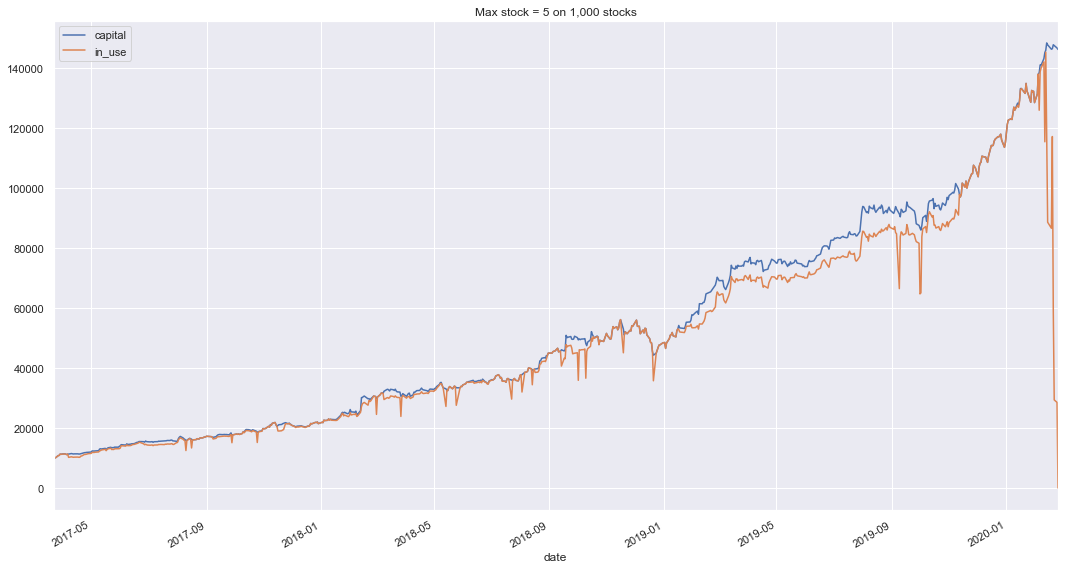

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 1,000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df['daily_comp_pct'] = (((1 + sell_df.gain_pct/100) ** (1/ sell_df.days_in_trade)) - 1)*100
sell_df

action  close_amount    daily_gain     daily_pct  daily_return       date  \
0    SELL   2000.000000 -2.273737e-13 -1.136868e-14           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
..    ...           ...           ...           ...           ...        ...   
0    SELL  31088.536535  1.798711e+03  6.141079e+00           NaN 2020-02-20   
0    SELL  29273.863516 -1.596176e+01 -5.449591e-02           NaN 2020-02-20   
0    SELL  29057.366342 -2.324589e+02 -7.936508e-01           NaN 2020-02-20   
0    SELL  29496.104013 -7.712840e+01 -2.608048e-01           NaN 2020-02-21   
0    SELL  28074.452947 -4.928872e+02 -1.725352e+00           NaN 2020-02-25   

    days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0               1         0   355.871886   2000.000000      5.058   CVGI   
0               1         0   173.160173   2000.000000     10.395   LNDC   
0               1         0   215.053763   2000.000000      8.370   NATR   
0               1         0    49.164208   2000.000000     36.612   ICFI   
0               1         0   754.716981   2000.000000      2.385    APT   
..            ...       ...          ...           ...        ...    ...   
0               2         0  2430.690894  29289.825273     10.845   LAKE   
0               2         0   159.617576  29289.825273    165.150    UNP   
0               2         0  7748.631025  29289.825273      3.402   FLDM   
0               2         0  1101.834293  29573.232413     24.156   HFWA   
0               4         0  1005.892259  29573.232413     26.460   CCBG   

            gain  gain_pct  daily_comp_pct  
0  -2.273737e-13     -0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
..           ...       ...             ...  
0   1.798711e+03      6.14        3.024269  
0  -1.596176e+01     -0.05       -0.025003  
0  -2.324589e+02     -0.79       -0.395783  
0  -7.712840e+01     -0.26       -0.130085  
0  -1.498779e+03     -5.07       -1.292337  

[566 rows x 15 columns]

In [9]:
sell_df.describe()

close_amount   daily_gain   daily_pct  daily_return  days_in_trade  \
count    566.000000   566.000000  566.000000           0.0     566.000000   
mean   10412.896595    -4.312908    0.017025           NaN       7.438163   
std     7756.065322   333.776641    4.685656           NaN      21.445685   
min     1844.742622 -1355.811791  -32.651549           NaN       1.000000   
25%     3828.240943   -39.179990   -0.566349           NaN       1.000000   
50%     7111.126854     0.000000    0.000000           NaN       2.000000   
75%    15537.983803    21.811815    0.354745           NaN       5.000000   
max    40118.197873  3896.719316   86.956522           NaN     389.000000   

       invested     no_shares   orig_amount    stop_loss          gain  \
count     566.0    566.000000    566.000000   566.000000    566.000000   
mean        0.0   1137.668817  10172.101093    50.759168    240.795502   
std         0.0   2664.407118   7546.649596   203.616340   1290.630874   
min         0.0      0.655414   1844.742622     0.477000  -2506.350951   
25%         0.0    118.416353   3789.232809     7.452000    -10.450736   
50%         0.0    322.775017   7052.471152    21.244500      0.000000   
75%         0.0   1084.668205  15115.914480    50.310000    136.085684   
max         0.0  38165.737685  29573.232413  3434.724000  20607.993272   

         gain_pct  daily_comp_pct  
count  566.000000      566.000000  
mean     2.777420        0.093353  
std     12.930826        0.988427  
min    -35.180000       -4.444620  
25%     -0.110000       -0.052514  
50%      0.000000        0.000000  
75%      1.890000        0.360386  
max    114.080000        8.508064

In [10]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0   SELL   1855.373846  -899.513332 -32.651549           NaN 2017-09-28   
0   SELL   4870.092426  -795.117131 -14.035088           NaN 2018-03-27   
0   SELL   7941.993754 -1355.811791 -14.582062           NaN 2018-11-19   
0   SELL   8540.651339 -1313.946360 -13.333333           NaN 2018-12-21   
0   SELL   4960.503502  -314.328935  -5.959032           NaN 2018-08-14   
0   SELL  16039.337287  -994.687584  -5.839416           NaN 2019-10-01   
0   SELL  16288.172290  -977.290337  -5.660377           NaN 2019-10-02   
0   SELL   5872.863715  -230.955315  -3.783784           NaN 2018-05-14   
0   SELL   7824.867728  -230.049194  -2.856010           NaN 2018-10-02   
0   SELL   2772.049562  -103.056663  -3.584447           NaN 2017-08-16   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0             79         0    40.831291   2862.273473     63.090   DXCM   
0             29         0   292.322475   6030.612650     18.567    UNT   
0             11         0   283.642634   9697.741659     30.771    RPD   
0             42         0   429.394235  10137.997894     21.249   CDNA   
0              6         0   982.277921   5765.971398      5.283   ENPH   
0             21         0   654.399726  18545.688238     25.506    ODT   
0              8         0  8144.086145  18731.398133      2.070   REKR   
0              3         0  3299.361638   6730.697741      1.836   INSG   
0             17         0   319.512770   8885.650123     25.029    SYX   
0             13         0   174.672310   3140.608137     16.182    UNT   

          gain  gain_pct  daily_comp_pct  
0 -1006.899627    -35.18       -0.547302  
0 -1160.520224    -19.24       -0.734148  
0 -1755.747905    -18.10       -1.798817  
0 -1597.346555    -15.76       -0.407502  
0  -805.467895    -13.97       -2.476715  
0 -2506.350951    -13.51       -0.688767  
0 -2443.225843    -13.04       -1.731361  
0  -857.834026    -12.75       -4.444620  
0 -1060.782395    -11.94       -0.745161  
0  -368.558574    -11.74       -0.956040

In [11]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0   SELL  14605.177262   256.818866   1.789883           NaN 2018-09-14   
0   SELL  40118.197873    10.869195   0.027100           NaN 2020-02-05   
0   SELL   9121.291945   188.553839   2.110818           NaN 2018-03-09   
0   SELL   8377.946529  3896.719316  86.956522           NaN 2018-02-13   
0   SELL   6004.191444   264.890799   4.615385           NaN 2017-11-16   
0   SELL   3354.590687    31.609806   0.951249           NaN 2017-04-07   
0   SELL  10789.868567    74.551846   0.695750           NaN 2019-11-12   
0   SELL  21965.786923   355.785742   1.646394           NaN 2019-09-05   
0   SELL  16429.696961   239.806898   1.481214           NaN 2019-03-21   
0   SELL   3415.497799   -37.572739  -1.088096           NaN 2017-06-26   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0             44         0   558.301883   6822.449011     10.998   CDNA   
0             64         0  1086.919476  19510.204601     16.155   ENPH   
0             36         0  2356.922983   4572.430587      1.746   ENPH   
0             31         0  1948.359658   4208.456861      1.944     ZN   
0             86         0   173.131241   3142.332027     16.335   PTSI   
0             11         0   395.122578   1995.369019      4.545    SYX   
0            389         0   201.491477   6602.875685     29.493   ESNT   
0            128         0   265.511748  13851.747900     46.953   MEDP   
0             44         0   584.894872  10615.841931     16.335   KALV   
0             47         0    22.634180   2270.660962     90.288   NVDA   

           gain  gain_pct  daily_comp_pct  
0   7782.728250    114.08        1.745004  
0  20607.993272    105.63        1.132787  
0   4548.861358     99.48        1.936692  
0   4169.489668     99.07        2.245770  
0   2861.859417     91.07        0.755713  
0   1359.221668     68.12        4.836099  
0   4186.992882     63.41        0.126325  
0   8114.039023     58.58        0.360875  
0   5813.855030     54.77        0.997602  
0   1144.836837     50.42        0.872424

In [12]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(146, 0.2579505300353357)

In [13]:
myPnL_df

action  close_amount  daily_gain  daily_pct  daily_return       date  \
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
..    ...           ...         ...        ...           ...        ...   
0   CLOSE  29573.232413    0.000000        NaN      0.000000 2020-02-20   
0    SELL  29496.104013  -77.128400  -0.260805           NaN 2020-02-21   
0   CLOSE  29382.112884 -191.119529        NaN     -0.646259 2020-02-21   
0   CLOSE  28567.340154 -814.772730        NaN     -2.773023 2020-02-24   
0    SELL  28074.452947 -492.887207  -1.725352           NaN 2020-02-25   

    days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  
0               0         0    25.471218   2000.000000     70.668    WST  
0               0         0   355.871886   2000.000000      5.058   CVGI  
0               0         0   173.160173   2000.000000     10.395   LNDC  
0               0         0   215.053763   2000.000000      8.370   NATR  
0               0         0    25.113009   2000.000000     71.676    REX  
..            ...       ...          ...           ...        ...    ...  
0               1         0  1005.892259  29573.232413     26.460   CCBG  
0               2         0  1101.834293  29573.232413     24.156   HFWA  
0               2         0  1005.892259  29573.232413     26.460   CCBG  
0               3         0  1005.892259  29573.232413     26.460   CCBG  
0               4         0  1005.892259  29573.232413     26.460   CCBG  

[4776 rows x 12 columns]

In [14]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['CVGI', 'LNDC', 'NATR', 'ICFI', 'APT', 'TDG', 'AMP', 'USM', 'REX',
        'WST', 'ARWR', 'IMMR', 'VTNR', 'JCS', 'TECH', 'EXAS', 'HOFT',
        'DXCM', 'RICK', 'PKBK', 'CHNR', 'LAWS', 'CCMP', 'MTEM', 'SYX',
        'ISSC', 'WCN', 'SIRI', 'ROST', 'SKYW', 'PTSI', 'LAKE', 'WEC',
        'PLOW', 'CVX', 'AXU', 'ZN', 'AUB', 'WOR', 'TGNA', 'CORT', 'BASI',
        'CRMT', 'MSEX', 'GLUU', 'IAG', 'SEB', 'MASI', 'PCTI', 'OFG', 'VSH',
        'DOV', 'GLOW', 'SMP', 'APEN', 'TNAV', 'FICO', 'LULU', 'NEM',
        'TIPT', 'BTE', 'STRL', 'CVI', 'SANM', 'PRO', 'FLNT', 'SMTC',
        'CATC', 'NVDA', 'RF', 'DSGX', 'CTAS', 'MCRI', 'DPZ', 'BHLB', 'CBU',
        'CASS', 'WAT', 'TRNS', 'NOA', 'AMWD', 'IMAX', 'UNT', 'RGS', 'AMGN',
        'ALOT', 'PCRX', 'WMT', 'PRAA', 'KMI', 'TBBK', 'AEP', 'SRE', 'UI',
        'BBY', 'BOCH', 'MDP', 'KMX', 'PFIS', 'HCCI', 'NSIT', 'GRPN',
        'HURN', 'PEBO', 'JJSF', 'VNRX', 'MLP', 'FOLD', 'AQN', 'CHEF',
        'DFS', 'COOP', 'ADP', 'RNR', 'EDSA', 'BOOM', 'AVAV', 

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
93    ENPH  27838.209637
171   MEDP   8114.039023
56    CDNA   7519.359034
185    NOA   7271.471576
230   RUBI   6896.648162
272   VNRX   5989.113081
66    COUP   5941.419029
231   SALT   5802.273313
191   NXRT   5077.526679
153   KALV   4995.678466

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
229    RPD -3595.175703
192    ODT -2506.350951
220   REKR -2443.225843
34    BCRX -1855.660290
5     AGRX -1551.229017
53    CCBG -1498.779466
208   PODD -1148.503352
201   PFNX -1128.035851
110   FOLD -1060.326532
106   FIVN -1010.560674

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker         gain
171   MEDP  8114.039023
93    ENPH  6959.552409
66    COUP  5941.419029
191   NXRT  5077.526679
94    ESNT  4186.992882
121   GWRS  3620.755271
230   RUBI  3448.324081
184   NEWR  2948.426418
153   KALV  2497.839233
56    CDNA  1879.839759

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
192    ODT -2506.350951
220   REKR -2443.225843
229    RPD -1797.587852
53    CCBG -1498.779466
208   PODD -1148.503352
141   INSG  -857.834026
44    BPRN  -847.065872
5     AGRX  -775.614508
166   LUNA  -754.474001
110   FOLD  -530.163266

In [19]:
myCapital_df.tail()

date capital   in_use     free
date                                           
2020-02-19 2020-02-19  146525   117247  29277.9
2020-02-20 2020-02-20  147866  59146.5  88719.7
2020-02-21 2020-02-21  147598  29382.1   118216
2020-02-24 2020-02-24  146783  28567.3   118216
2020-02-25 2020-02-25  146290        0   146290

In [20]:
len(possible_trades_df)

9442

In [21]:
possible_trades_df.to_csv(f'{DATAPATH}possible_trades_1000.csv', index=False)
myCapital_df.to_csv(f'{DATAPATH}capital_1000.csv', index=False)
myPnL_df.to_csv(f'{DATAPATH}PnL_1000.csv', index=False)

In [22]:
ls ../data

F13_Renaissance_tech.csv  capital_0500.csv          possible_trades_1000.csv
F13_Renaissance_tech.txt  capital_1000.csv          possible_trades_1500.csv
PnL_0100.csv              capital_1500.csv          possible_trades_2000.csv
PnL_0500.csv              capital_2000.csv          stocks.csv
PnL_1000.csv              exclude.csv               stocks_100.csv
PnL_1500.csv              optimal_params.csv        stocks_1000.csv
PnL_2000.csv              possible_trades_0100.csv  stocks_2000.csv
capital_0100.csv          possible_trades_0500.csv  stocks_500.csv
